# Trabalho 1: Aprendizado de Máquina

### Dupla

Andreina Maria Mendes da Silva - 485306  
Augusto César Araújo de Oliveira - 508991

### Descrição do trabalho

A resolução deve conter:

 - Importação dos dados
 - Análise dos dados
 - Pré-processamento
 - Uso de modelos preditivos para obtenção de predições (classificação ou regressão)
   - Usar validação cruzada com k-Fold sobre o conjunto de treino.
   - Usar pelo menos 3 diferentes algoritmos de aprendizado de máquina.
   - Usar diferentes hiper-parâmetros para cada algoritmo escolhido.
   - Comparar resultados com e sem escalonamento de características (features).
 - Avaliação dos resultados através de métricas (RMSE para regressão e F1-Score para classificação) sobre o conjunto de treino e de teste.
 - Apresentação dos resultados através de tabela e gráfico de barras.
 - A apresentação do trabalho é obrigatória para ambos os membros da dupla. Quem não apresentar o trabalho, ficará com nota ZERO.
 - O Jupyter Notebook deve conter também a divisão de tarefas, mostrando o que cada membro da dupla efetivamente fez no trabalho. Divida as tarefas definidas entre os membros da dupla.  
IMPORTANTE: Somente um dos membros da dupla deve submeter o trabalho através do Moodle.

### Divisão de tarefas
 #### Andreina
  - Funções de treino
  - Funções de teste
  - Resultados


 #### Augusto
  - Análise dos dados
  - Escalonamento
  - Resultados

## Importação das bibliotecas necessárias

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

## Importação dos dados

In [2]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


# 1. Descrição dos dados

- Dataset: Diabetes Health Indicators Dataset

O conjunto de dados contém estatísticas de saúde e informações de pesquisas sobre estilo de vida sobre pessoas em geral, juntamente com seu diagnóstico de diabetes. As 22 colunas consistem em alguns dados demográficos, resultados de testes de laboratório e respostas a perguntas de pesquisas para cada paciente. A variável alvo para classificação é se o paciente tem diabetes, é pré-diabético ou saudável.
Obs.: Ser diabético ou pré-diabético foram classificados com o mesmo valor (1).

## 1.1. Dicionário de dados

In [ ]:
dict_ = {
    'Diabetes_binary': { 'descrição' : 'Informa se a pessoa tem diabetes(ou pré-diabetes) ou não tem diabetes',
                        'tipo': 'Binário'},
    'HighBP': {'descrição' : 'Informa se tem pressão alta',
                        'tipo': 'Binário'},
    'HighChol': {'descrição' : 'Informa se tem colesterol alto',
                        'tipo': 'Binário'},
    'CholCheck': {'descrição' : 'Informa se o colesterol foi verificado',
                        'tipo': 'Binário'},
    'BMI': {'descrição' : 'Informa índice de massa corporal',
                        'tipo': 'Inteiro'},
    'Smoker': {'descrição' : 'Informa se é fumante',
                        'tipo': 'Binário'},
    'Stroke': {'descrição' : 'Informa se já teve AVC',
                        'tipo': 'Binário'},
    'HeartDiseaseorAttack': {'descrição' : 'Informa se já teve uma doença cardíaca ou infarto',
                        'tipo': 'Binário'},
    'PhysActivity': {'descrição' : 'Informa se há prática de atividade física',
                        'tipo': 'Binário'},
    'Fruits': {'descrição' : 'Informa se há consumo de frutas',
                        'tipo': 'Binário'},
    'Veggies': {'descrição' : 'Informa se há consumo de vegetais',
                        'tipo': 'Binário'},
    'HvyAlcoholConsump': {'descrição' : 'Informa há um alto consumo  de álcool',
                        'tipo': 'Binário'},
    'AnyHealthcare': {'descrição' : 'Informa se há algum plano de saúde',
                        'tipo': 'Binário'},
    'NoDocbcCost': {'descrição' : 'Informa se foi necessária uma consulta, porém que não aconteceu por falta de dinheiro',
                        'tipo': 'Binário'},
    'GenHlth': {'descrição' : 'Informa uma análise pessoa de quão boa é a saúde em uma escala de 1 a 5',
                        'tipo': 'Inteiro'},
    'MentHlth': {'descrição' : 'Informa quantos dias a saúde mental não foi boa em uma escala de 1 a 30',
                        'tipo': 'Inteiro'},
    'PhysHlth': {'descrição' : 'Informa quantos dias a saúde física não foi boa em uma escala de 1 a 30',
                        'tipo': 'Inteiro'},
    'DiffWalk': {'descrição' : 'Informa se há dificuldade de andar ou subir escadas',
                        'tipo': 'Binário'},
    'Sex': {'descrição' : 'Informa sexo (0 - feminino, 1 - masculino)',
                        'tipo': 'Binário'},
    'Age': {'descrição' : 'Informa idade por uma categoria de idade de 13 níveis',
                        'tipo': 'Inteiro'},
    'Education': {'descrição' : 'Informa nível de escolaridade em uma escala de 1 a 6',
                        'tipo': 'Inteiro'},
    'Income': {'descrição' : 'Informa escala de renda de 1 a 8',
                        'tipo': 'Inteiro'}}

In [ ]:
display(dict_)
df_dict = pd.DataFrame(dict_)
display(df_dict.transpose())

{'Diabetes_binary': {'descrição': 'Informa se a pessoa tem diabetes(ou pré-diabetes) ou não tem diabetes',
  'tipo': 'Binário'},
 'HighBP': {'descrição': 'Informa se tem pressão alta', 'tipo': 'Binário'},
 'HighChol': {'descrição': 'Informa se tem colesterol alto',
  'tipo': 'Binário'},
 'CholCheck': {'descrição': 'Informa se o colesterol foi verificado',
  'tipo': 'Binário'},
 'BMI': {'descrição': 'Informa índice de massa corporal', 'tipo': 'Inteiro'},
 'Smoker': {'descrição': 'Informa se é fumante', 'tipo': 'Binário'},
 'Stroke': {'descrição': 'Informa se já teve AVC', 'tipo': 'Binário'},
 'HeartDiseaseorAttack': {'descrição': 'Informa se já teve uma doença cardíaca ou infarto',
  'tipo': 'Binário'},
 'PhysActivity': {'descrição': 'Informa se há prática de atividade física',
  'tipo': 'Binário'},
 'Fruits': {'descrição': 'Informa se há consumo de frutas', 'tipo': 'Binário'},
 'Veggies': {'descrição': 'Informa se há consumo de vegetais',
  'tipo': 'Binário'},
 'HvyAlcoholConsump': {'d

,descrição,tipo
Diabetes_binary,Informa se a pessoa tem diabetes(ou pré-diabet...,Binário
HighBP,Informa se tem pressão alta,Binário
HighChol,Informa se tem colesterol alto,Binário
CholCheck,Informa se o colesterol foi verificado,Binário
BMI,Informa índice de massa corporal,Inteiro
Smoker,Informa se é fumante,Binário
Stroke,Informa se já teve AVC,Binário
HeartDiseaseorAttack,Informa se já teve uma doença cardíaca ou infarto,Binário
PhysActivity,Informa se há prática de atividade física,Binário
Fruits,Informa se há consumo de frutas,Binário


Percebe-se que existem 15 classes binárias e 7 classes com valores inteiros dentro de um intervalo específico.

## 1.2. Informações do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

O dataset possui:
- 70692 linhas
- 22 colunas (features)

Todos os dados estão salvos no dataset como valores float.

## 1.3. Descrição Geral dos dados

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


## 1.4. Dados Faltantes

In [ ]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Percebe-se que o dataset não possui dados faltantes

# 2. Análise dos dados

- Funções auxiliares

In [ ]:
def IQR_range(data):
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    IQR = Q3 - Q1
    return IQR

def interval(data):
    return data.max() - data.min()

def central_tendency_measurement(data):
    print(f'Mean:', data.mean().round(3))
    print(f'Median:', data.median().round(3))
    print(f'Mode:', data.mode().tolist())

def dispersion_measurements(data):
    print(f'Standard Deviation:', data.std().round(3))
    print(f'Interquartile range:', IQR_range(data).round(3))
    print(f'Interval:', interval(data))

integer_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

## 2.1. Medidas de tendência central

As medidas de tendência central foram calculadas apenas para as variáveis inteiras, visto que as demais são binárias.

In [ ]:
for col in integer_features:
    print(col, ': ')
    central_tendency_measurement(df[col])
    print(' ')

BMI : 
Mean: 29.857
Median: 29.0
Mode: [27.0]
 
GenHlth : 
Mean: 2.837
Median: 3.0
Mode: [3.0]
 
MentHlth : 
Mean: 3.752
Median: 0.0
Mode: [0.0]
 
PhysHlth : 
Mean: 5.81
Median: 0.0
Mode: [0.0]
 
Age : 
Mean: 8.584
Median: 9.0
Mode: [10.0]
 
Education : 
Mean: 4.921
Median: 5.0
Mode: [6.0]
 
Income : 
Mean: 5.698
Median: 6.0
Mode: [8.0]
 


## 2.2. Medidas de Dispersão


As medidas de dispersão foram calculadas apenas para as variáveis inteiras, visto que as demais são binárias.

In [ ]:
for col in integer_features:
    print(col, ': ')
    dispersion_measurements(df[col])
    print(' ')

BMI : 
Standard Deviation: 7.114
Interquartile range: 8.0
Interval: 86.0
 
GenHlth : 
Standard Deviation: 1.114
Interquartile range: 2.0
Interval: 4.0
 
MentHlth : 
Standard Deviation: 8.156
Interquartile range: 2.0
Interval: 30.0
 
PhysHlth : 
Standard Deviation: 10.062
Interquartile range: 6.0
Interval: 30.0
 
Age : 
Standard Deviation: 2.852
Interquartile range: 4.0
Interval: 12.0
 
Education : 
Standard Deviation: 1.029
Interquartile range: 2.0
Interval: 5.0
 
Income : 
Standard Deviation: 2.175
Interquartile range: 4.0
Interval: 7.0
 


# 3. Matriz de Correlação

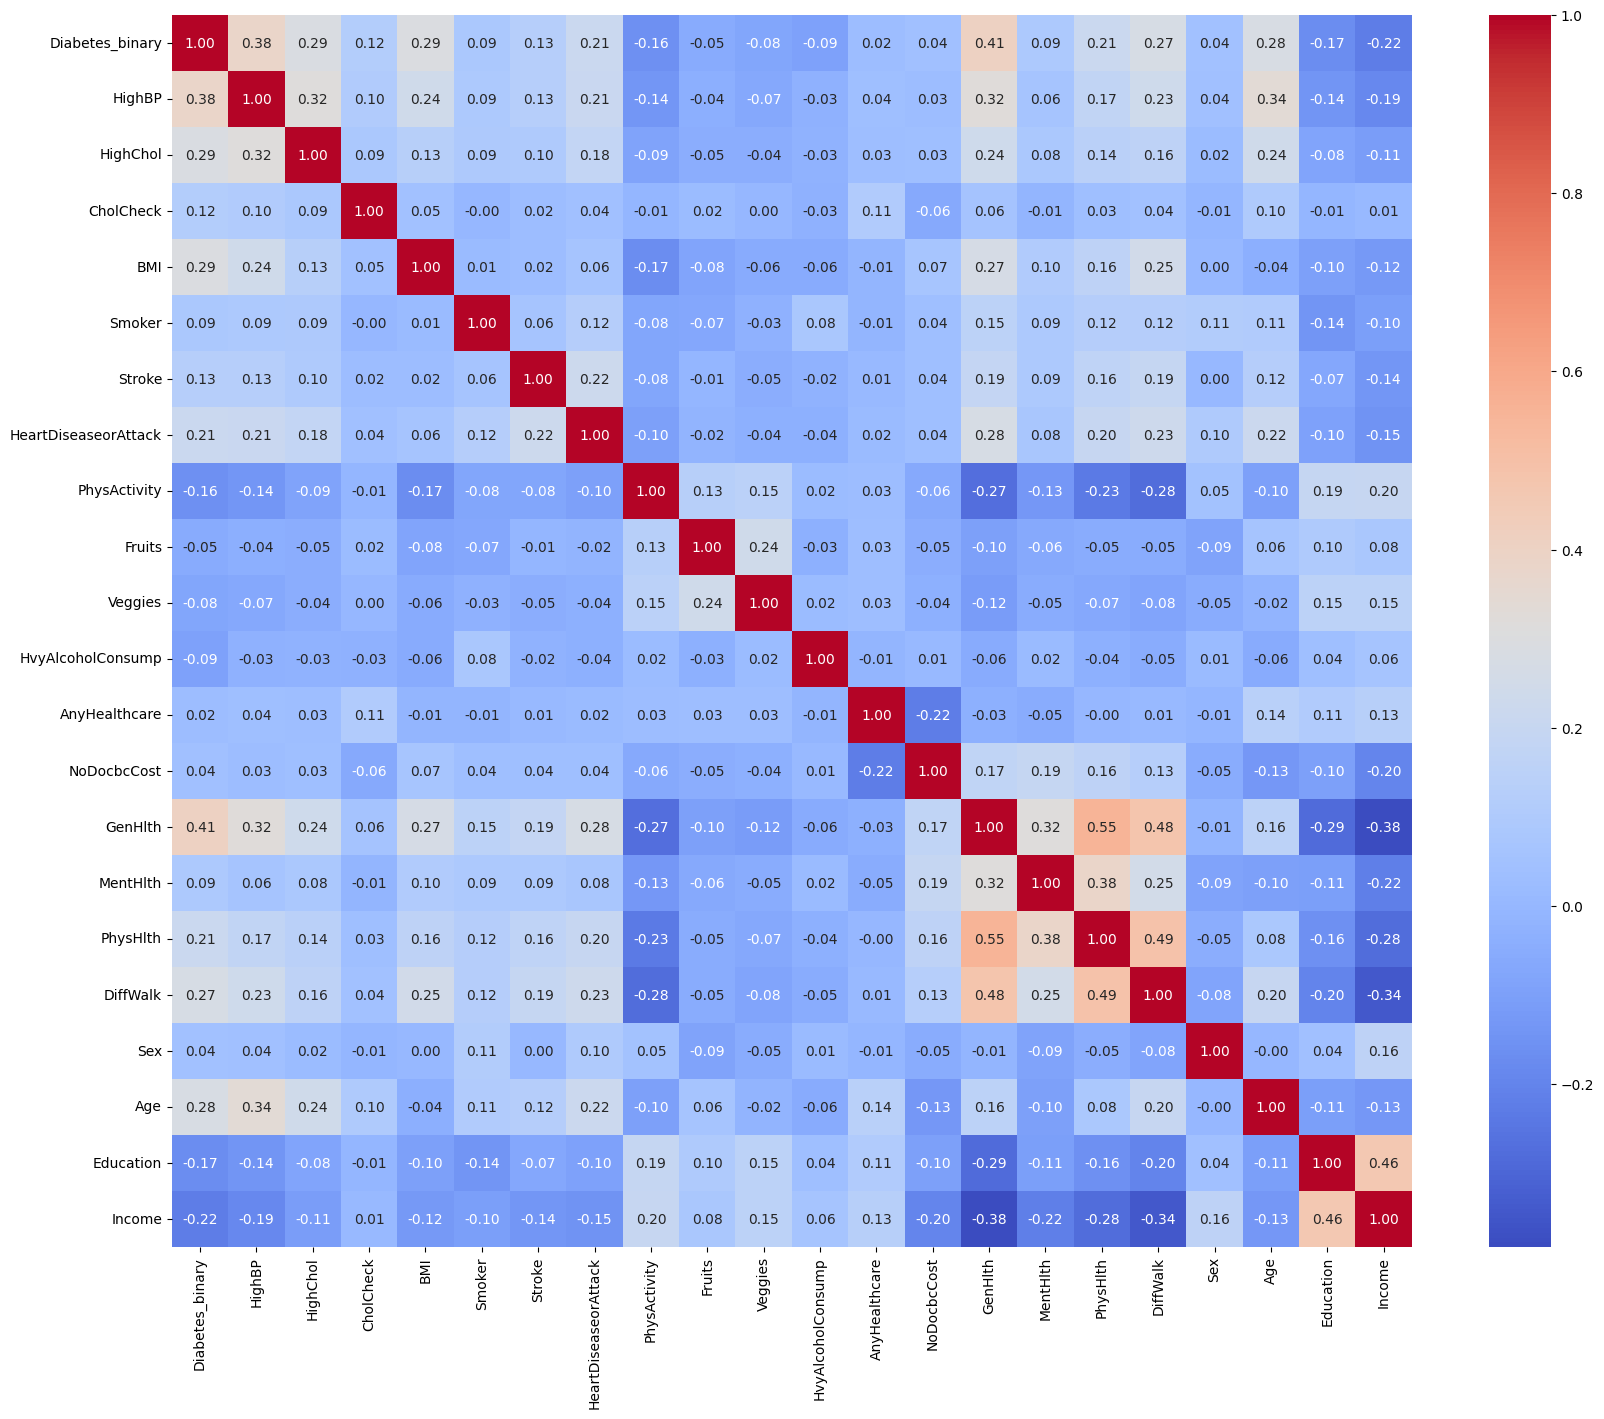

In [ ]:
quantitative_columns = df.select_dtypes(include=['float64']).columns
df_quant = df[quantitative_columns]

corr = df_quant.corr()

# Create heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

- Análises:

A coluna de diabetes está 30% correlacionada com a pressão alta, 41% com a autoavaliação de saúde e 29% correlacionada com as colunas de colesterol alto e IMC(BMI).

A pressão alta está 34% relacionada com a idade.

A renda está relacionada com a educação em 46%.

A autoavaliação de saúde está relacionada com a quantidade de dias que as pessoas não estavam com boa saúde física (55%) e com dificuldades de andar ou subir escadas (48%).

O número de dias com má saúde física está relacionado com os dias com má saúde mental (38%) e com a dificuldade de andar ou subir escadas (49%).



# 4. Gráficos de Barras

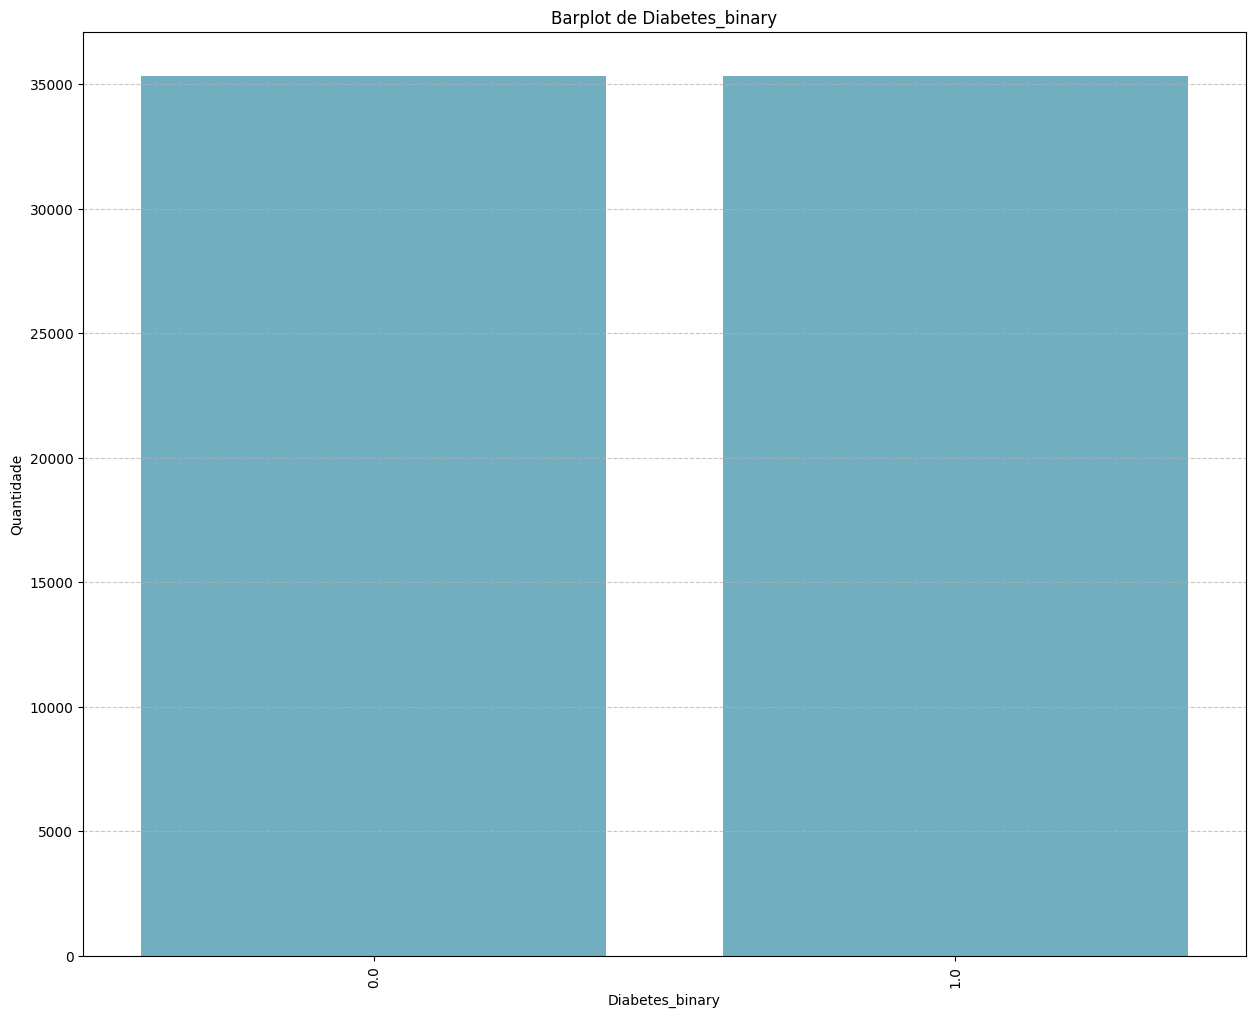

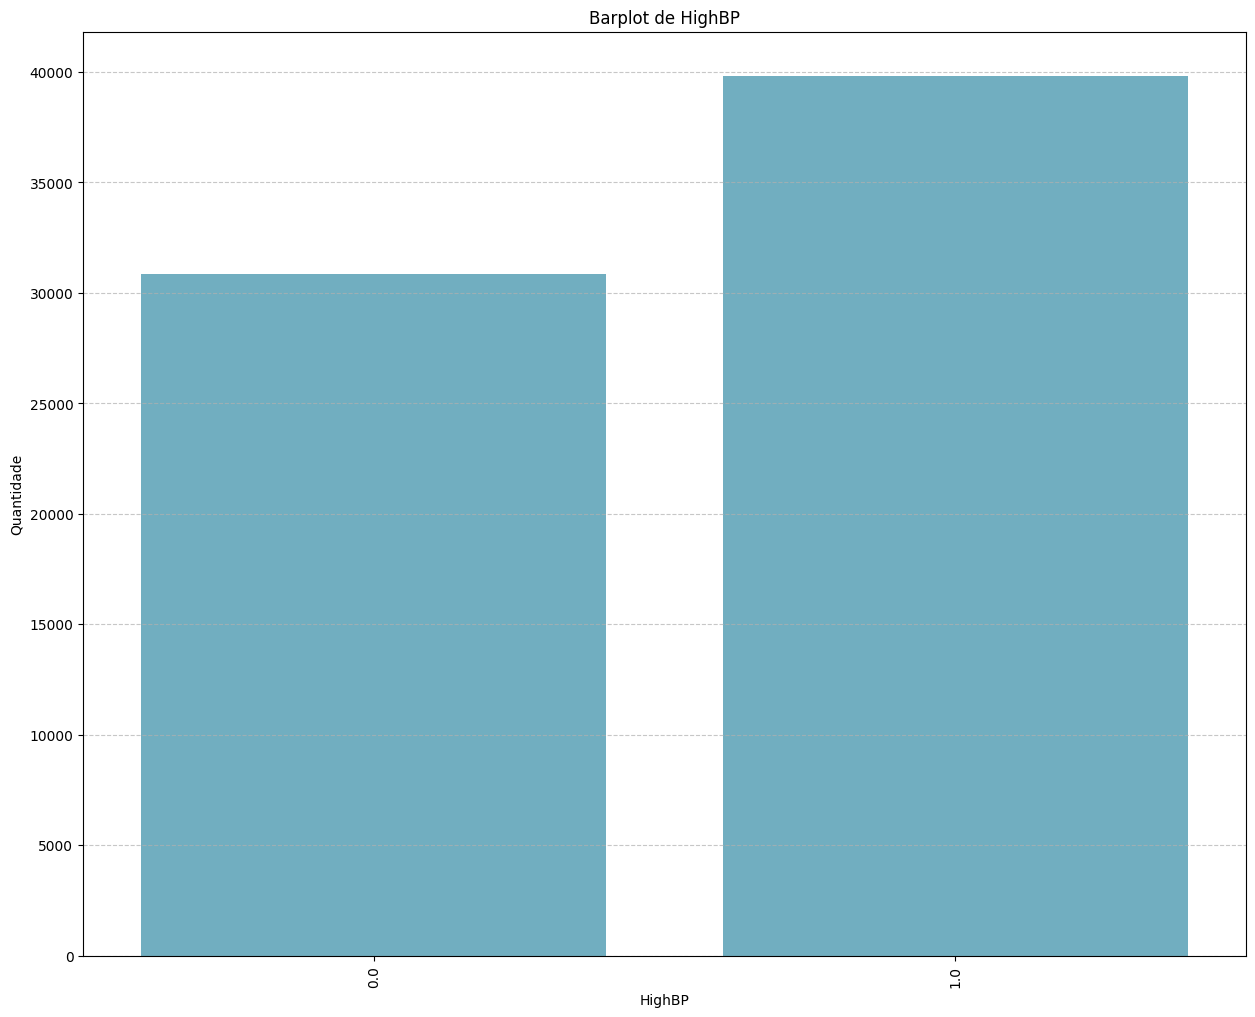

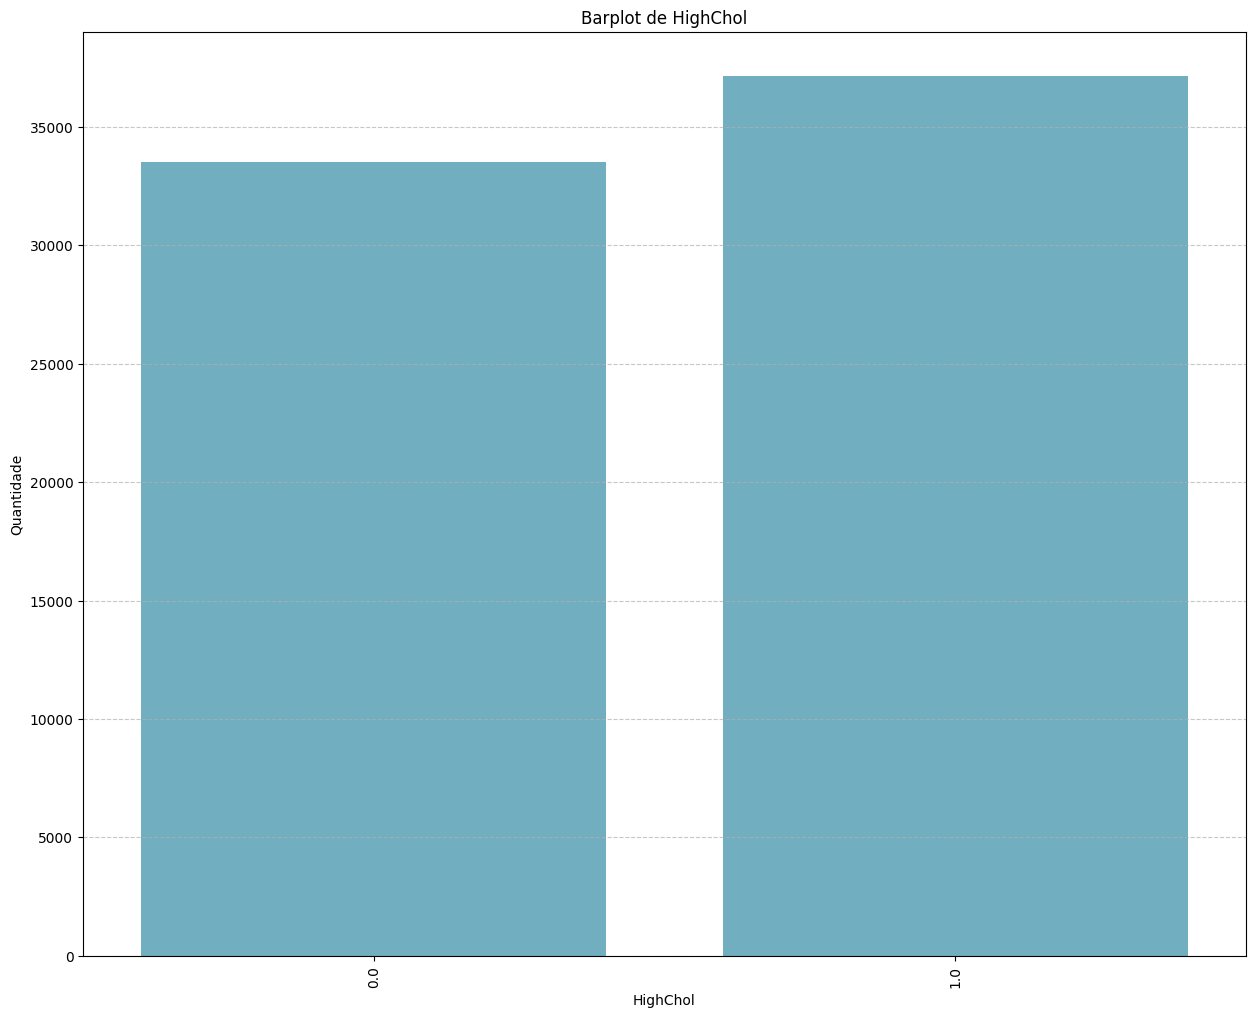

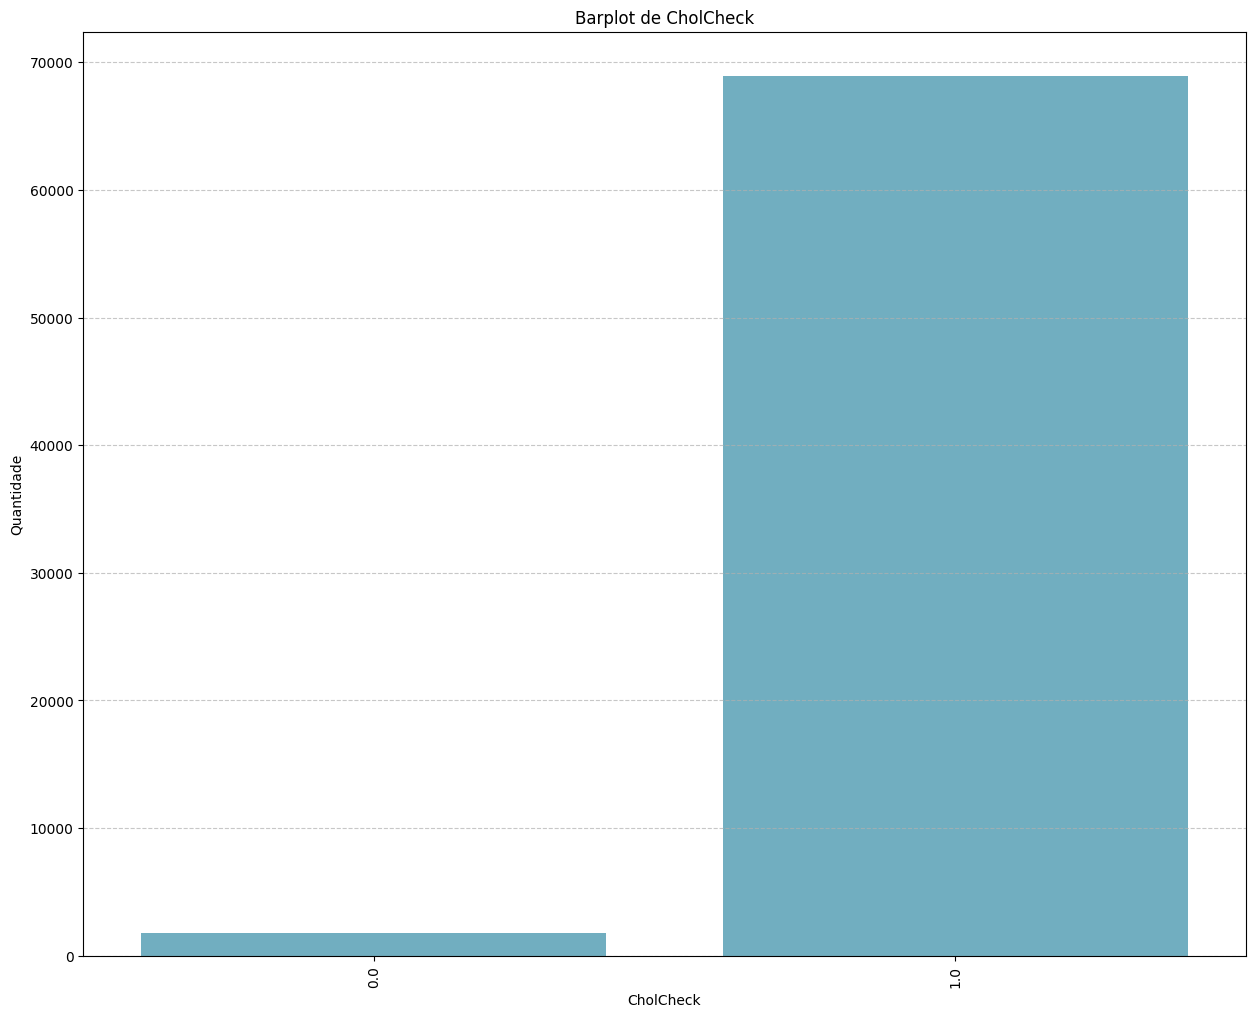

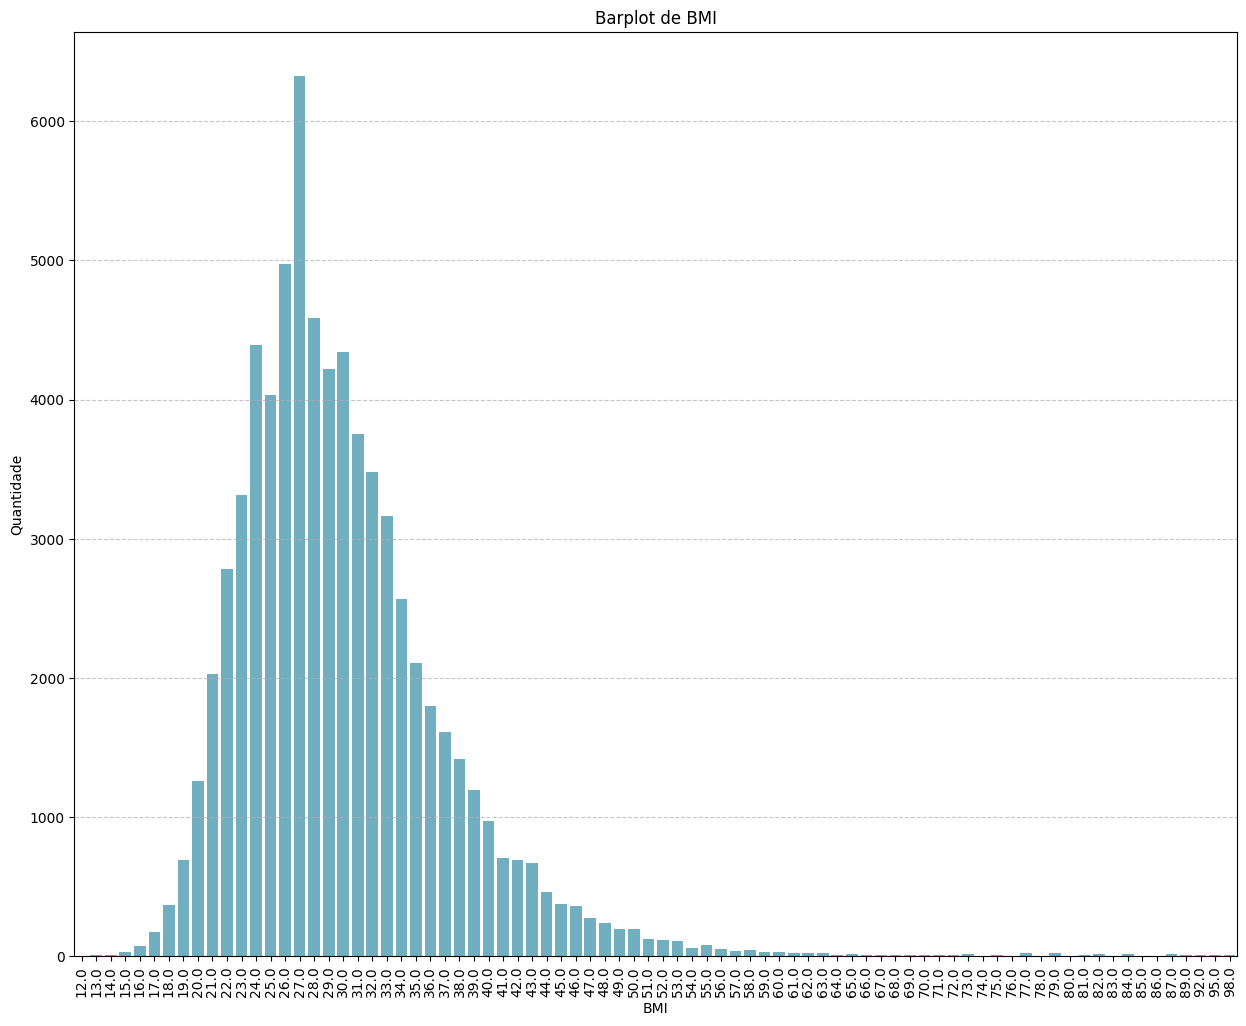

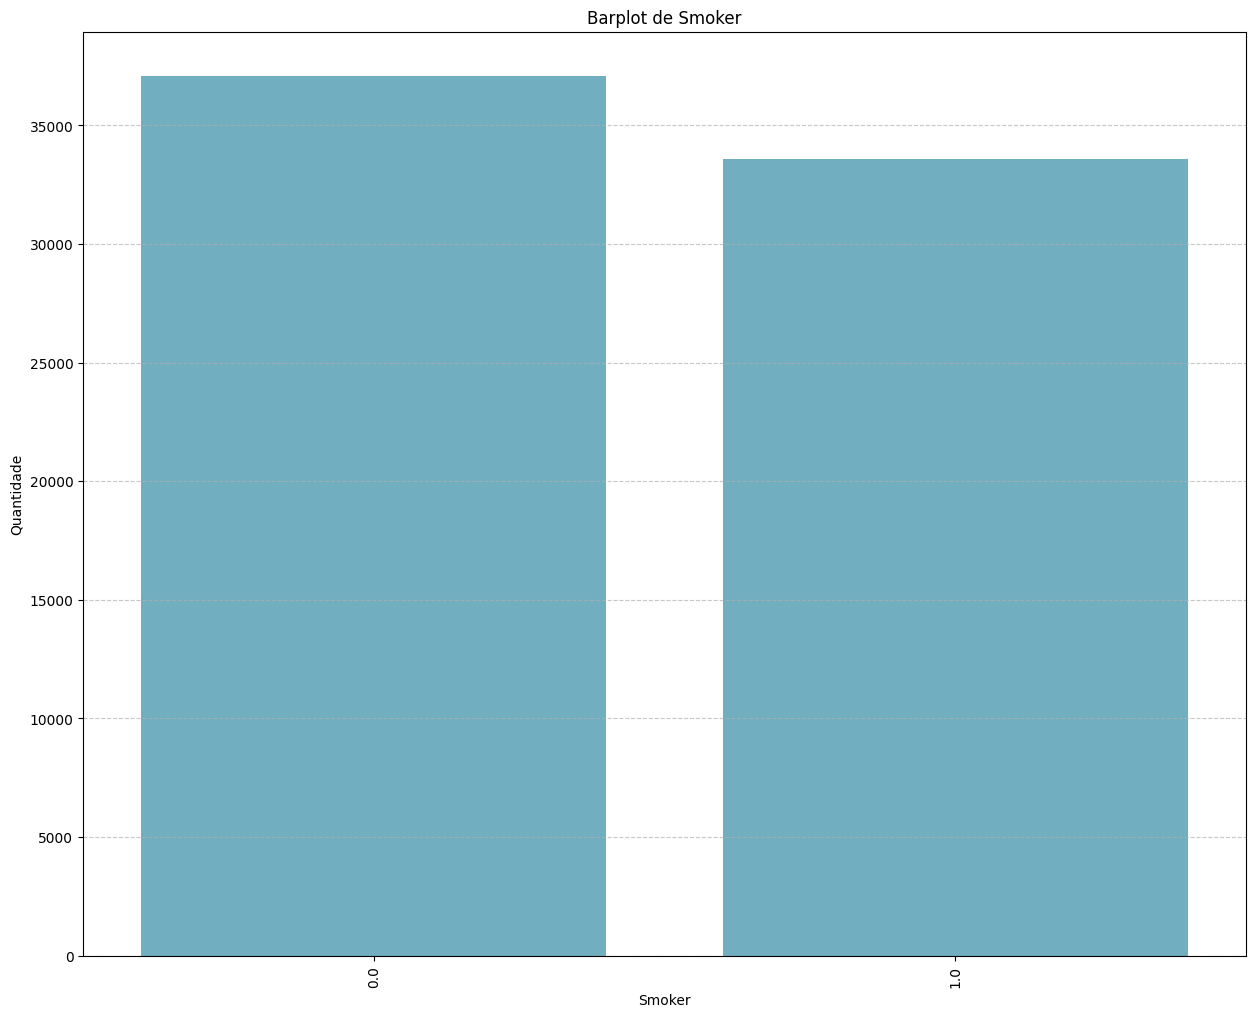

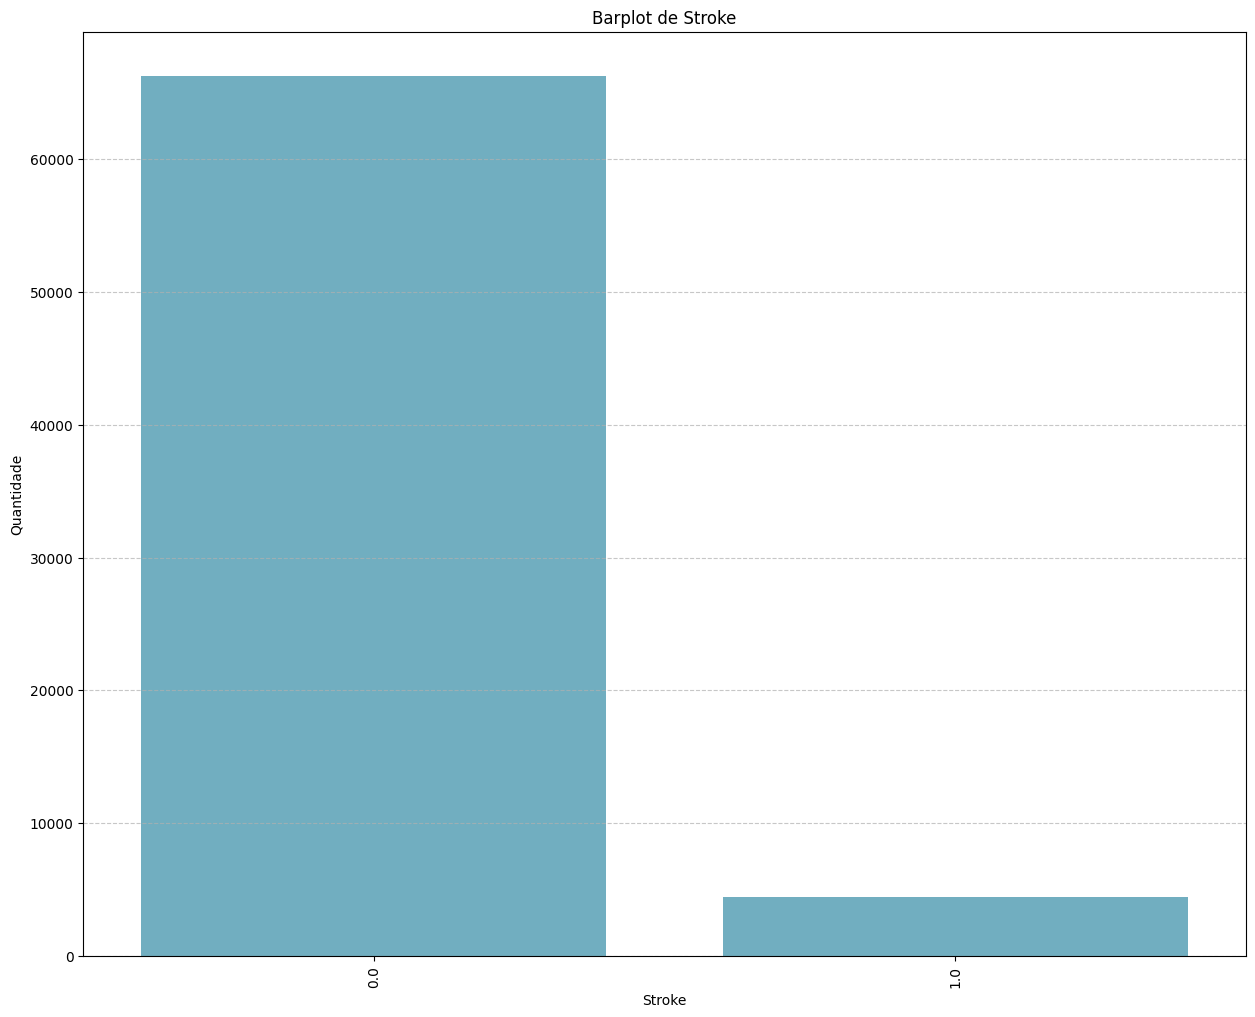

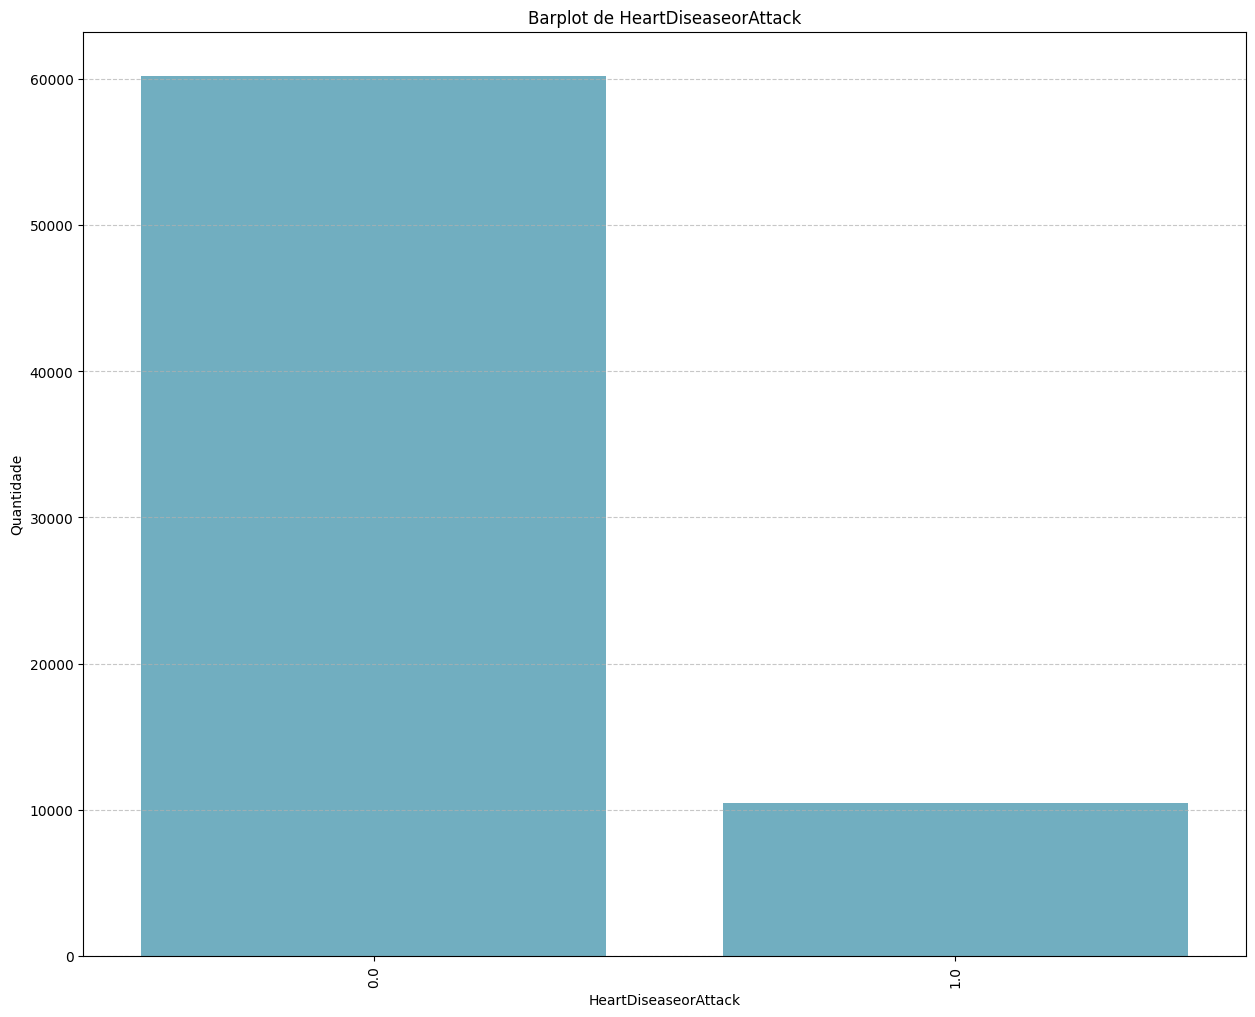

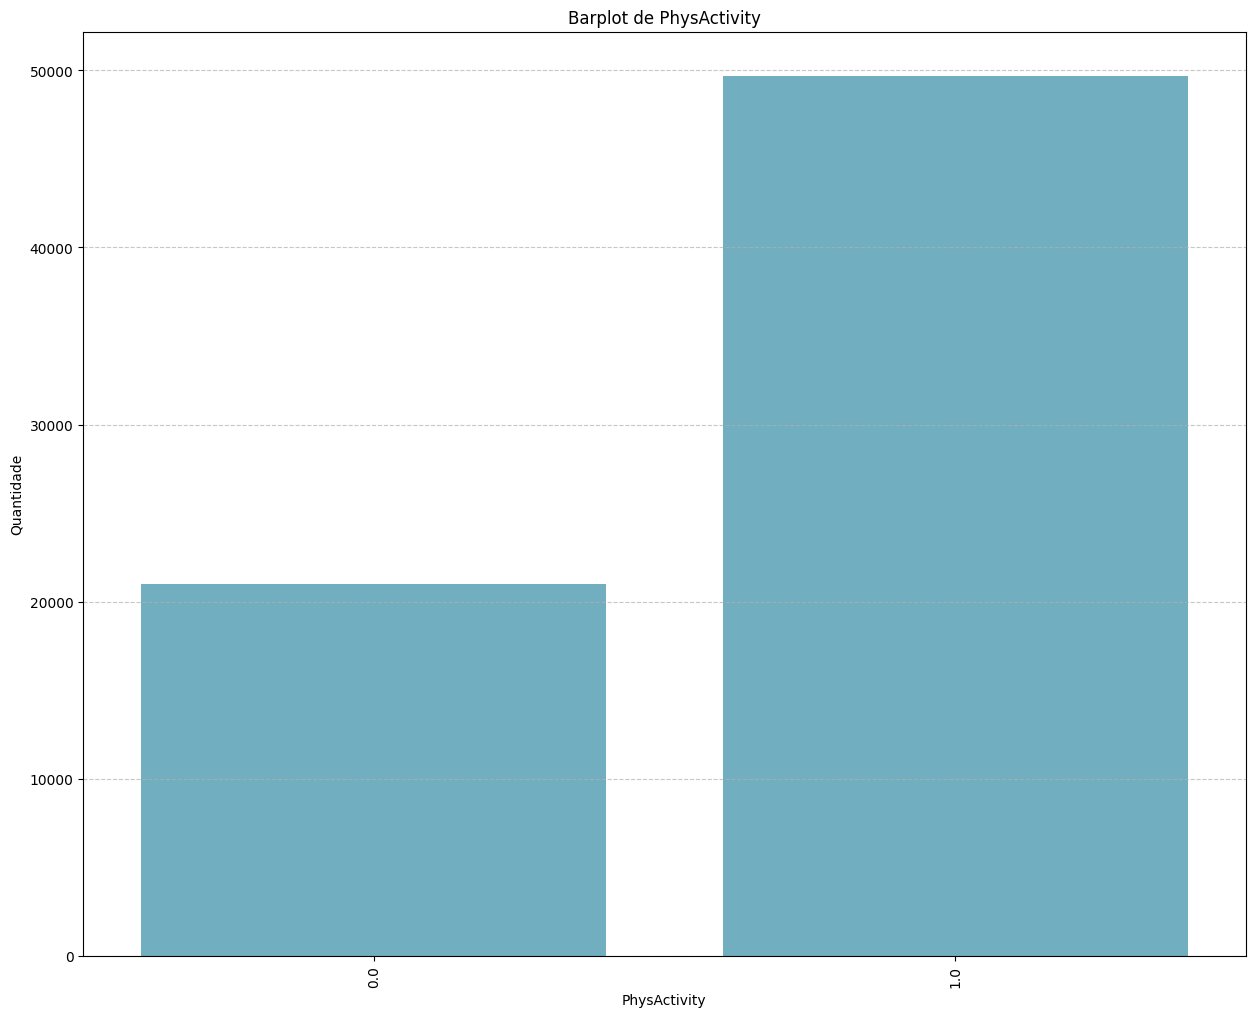

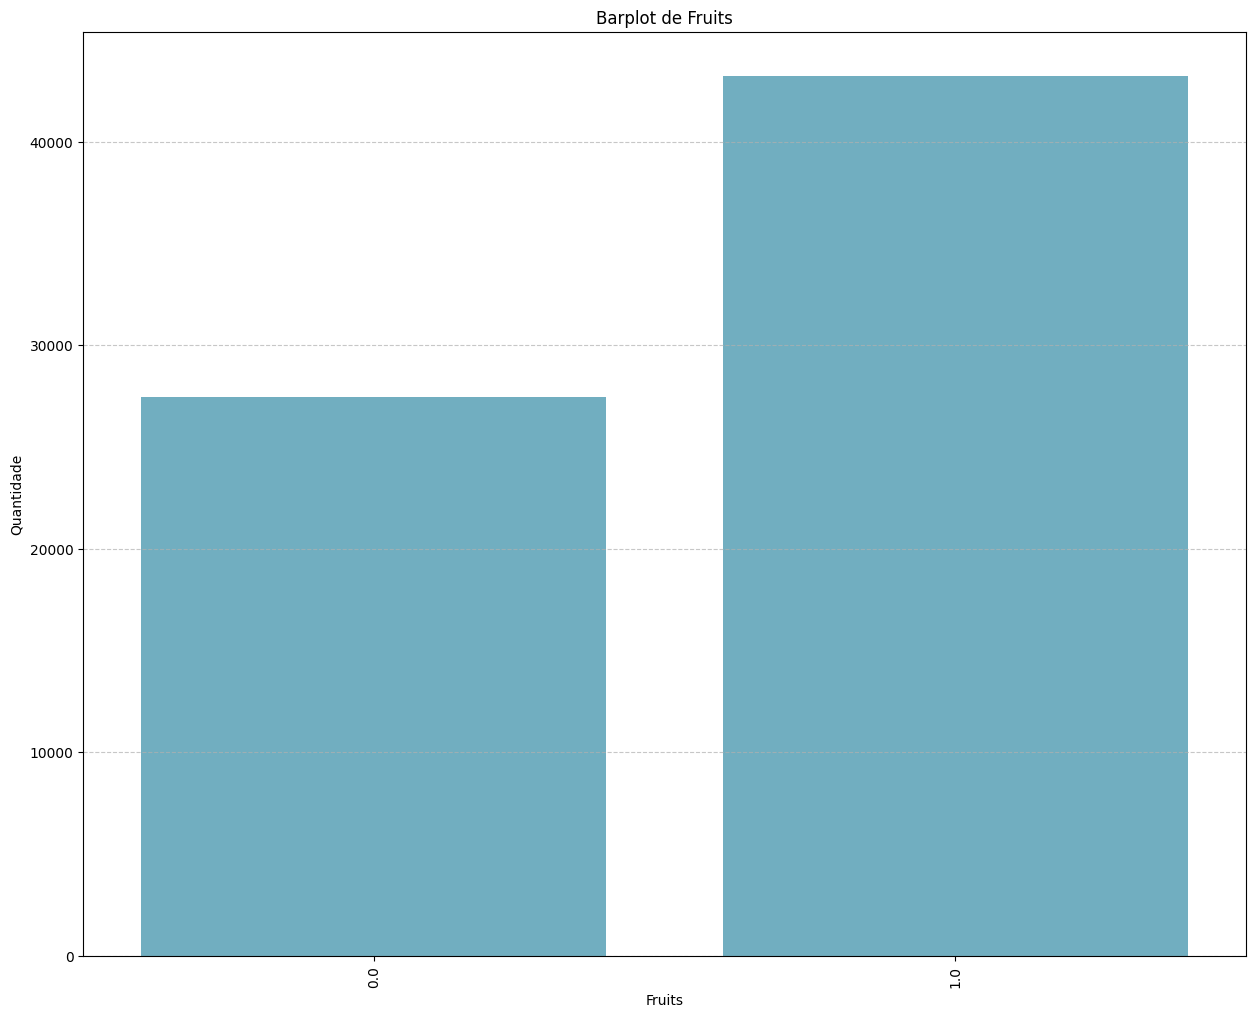

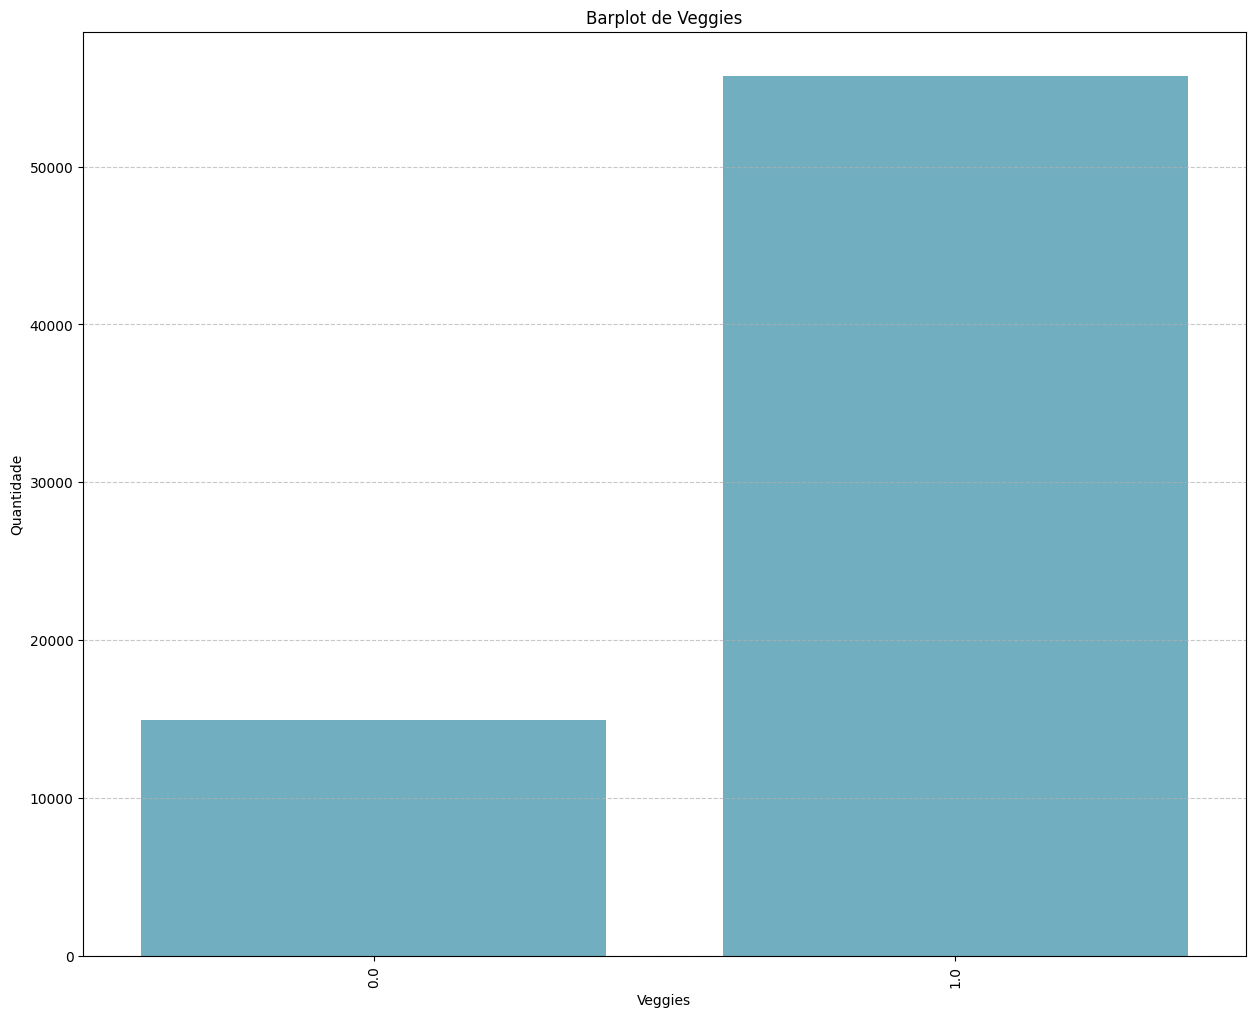

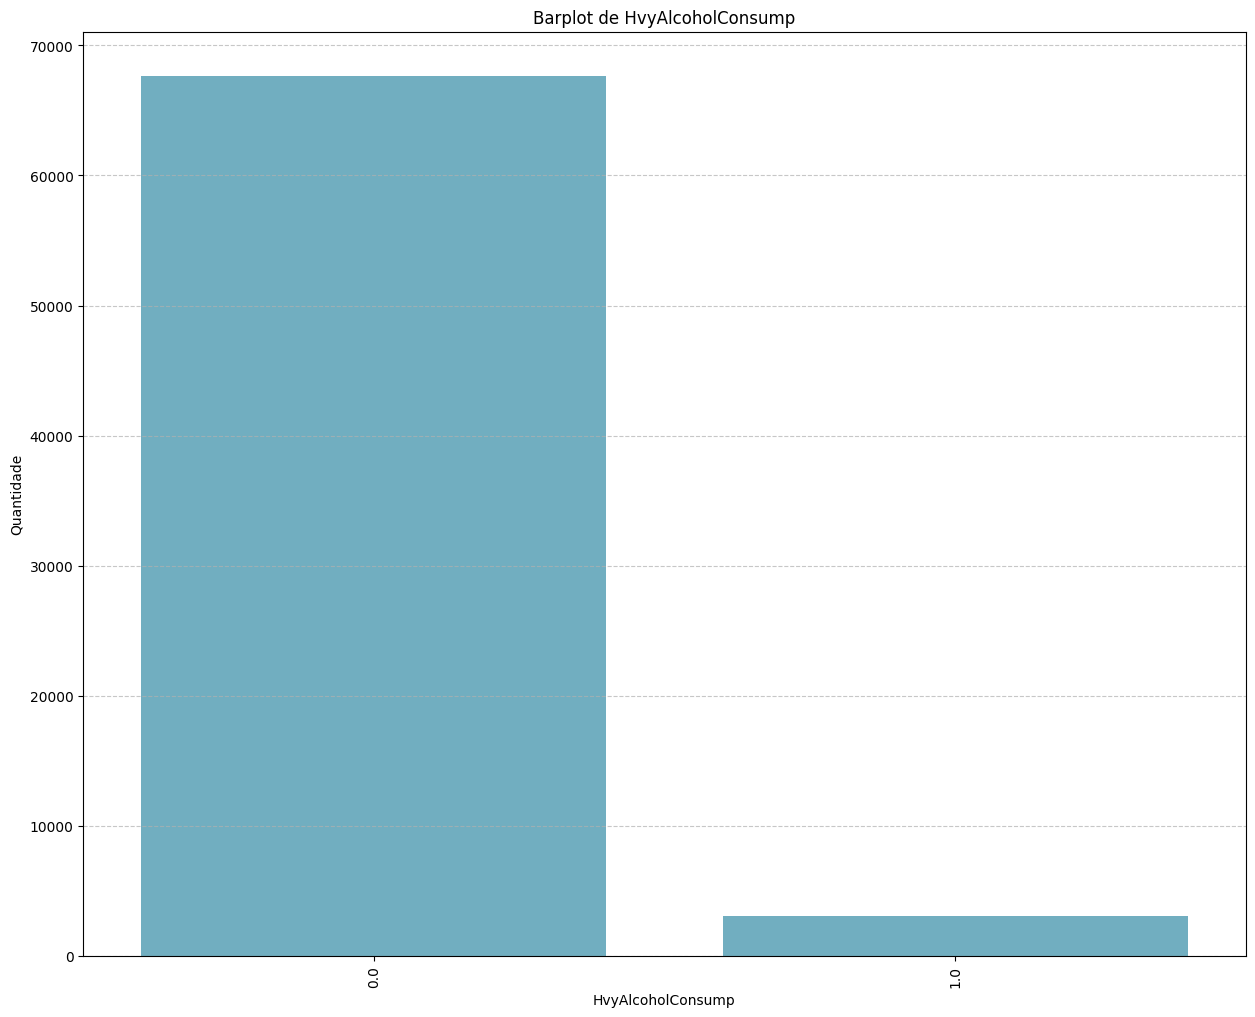

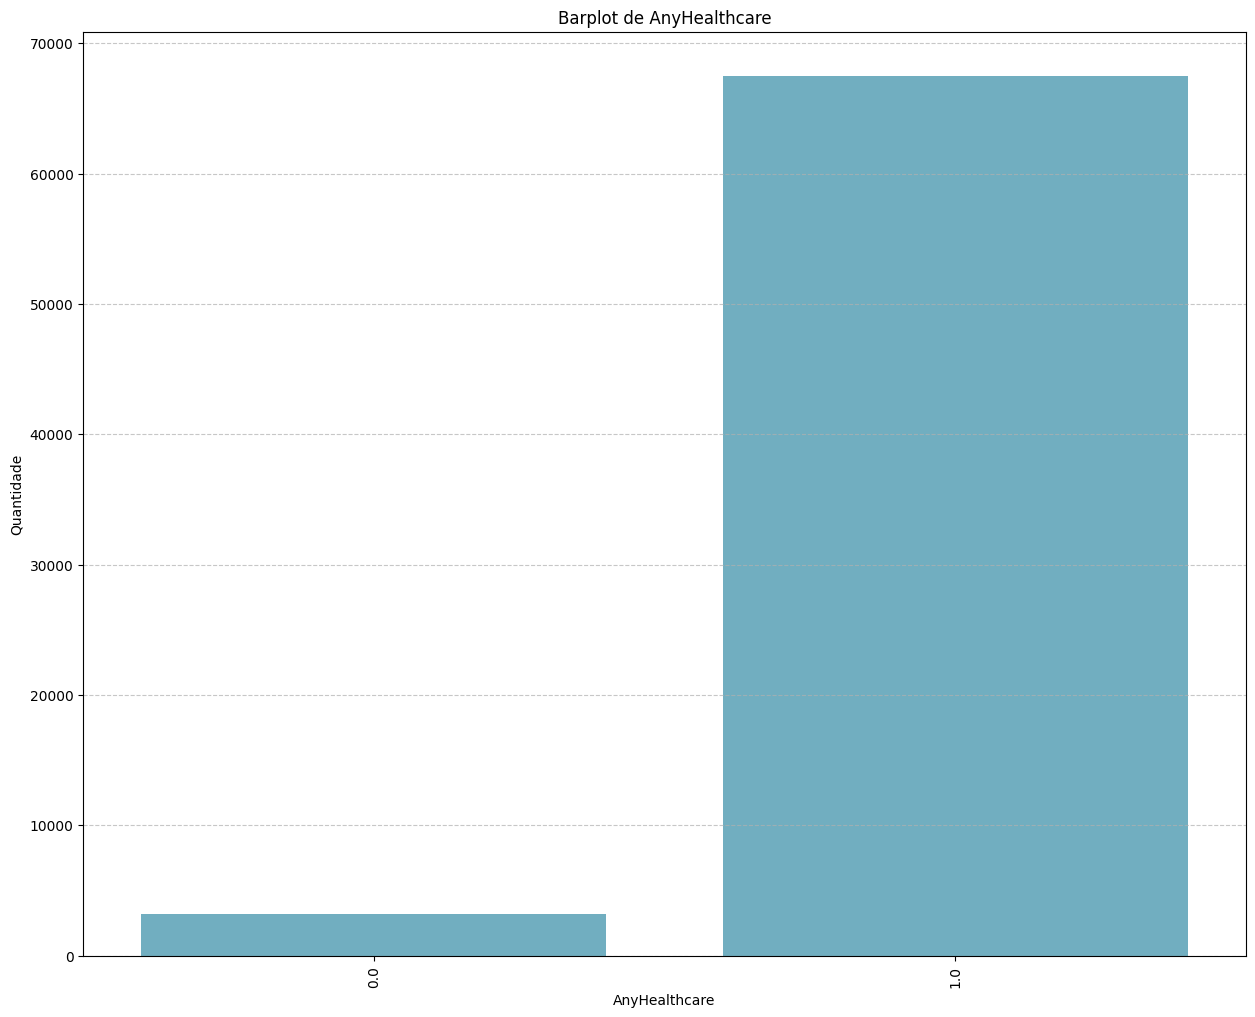

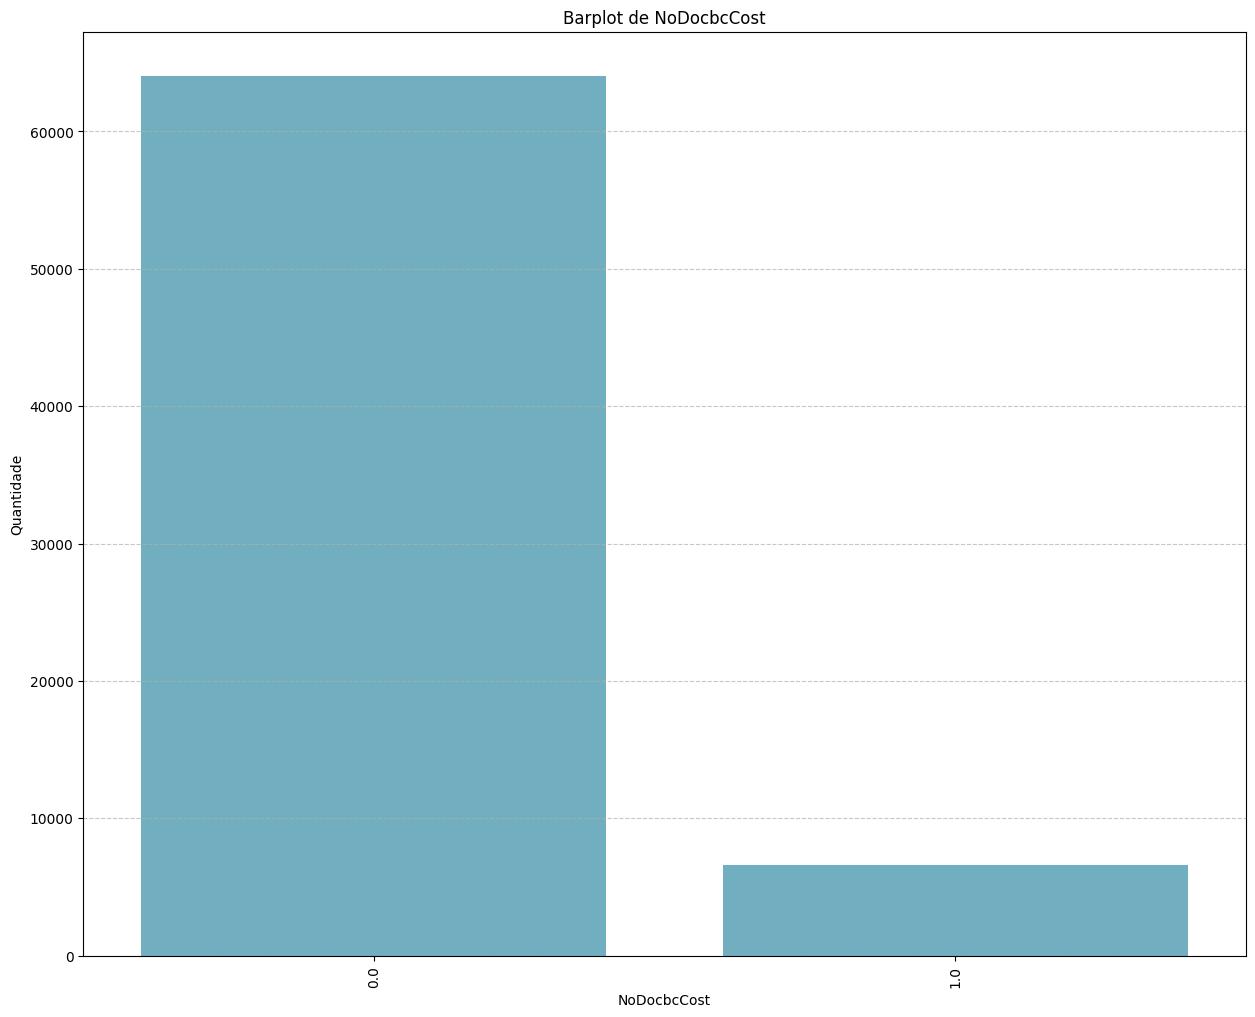

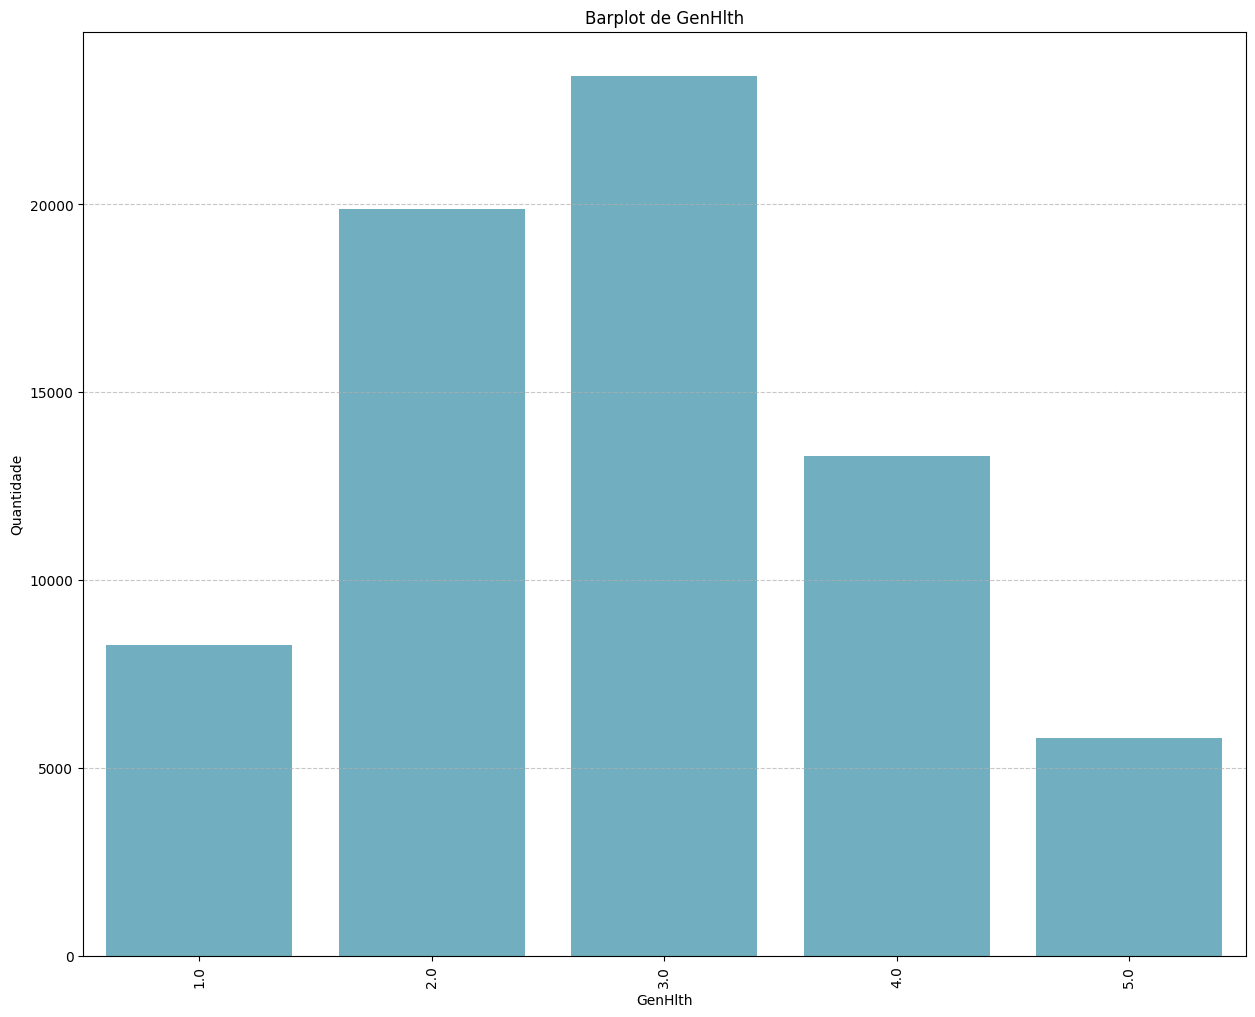

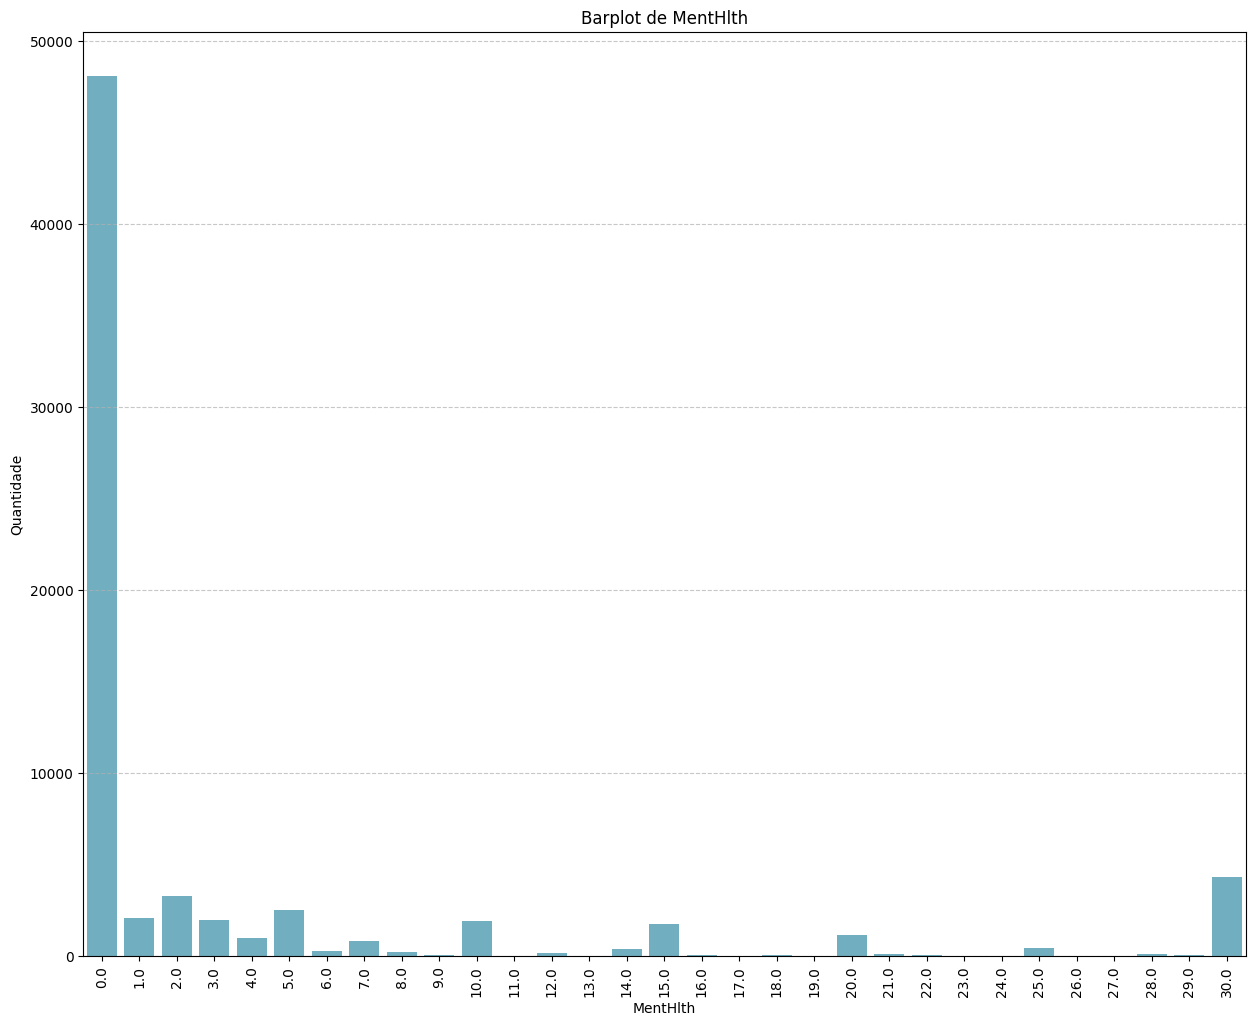

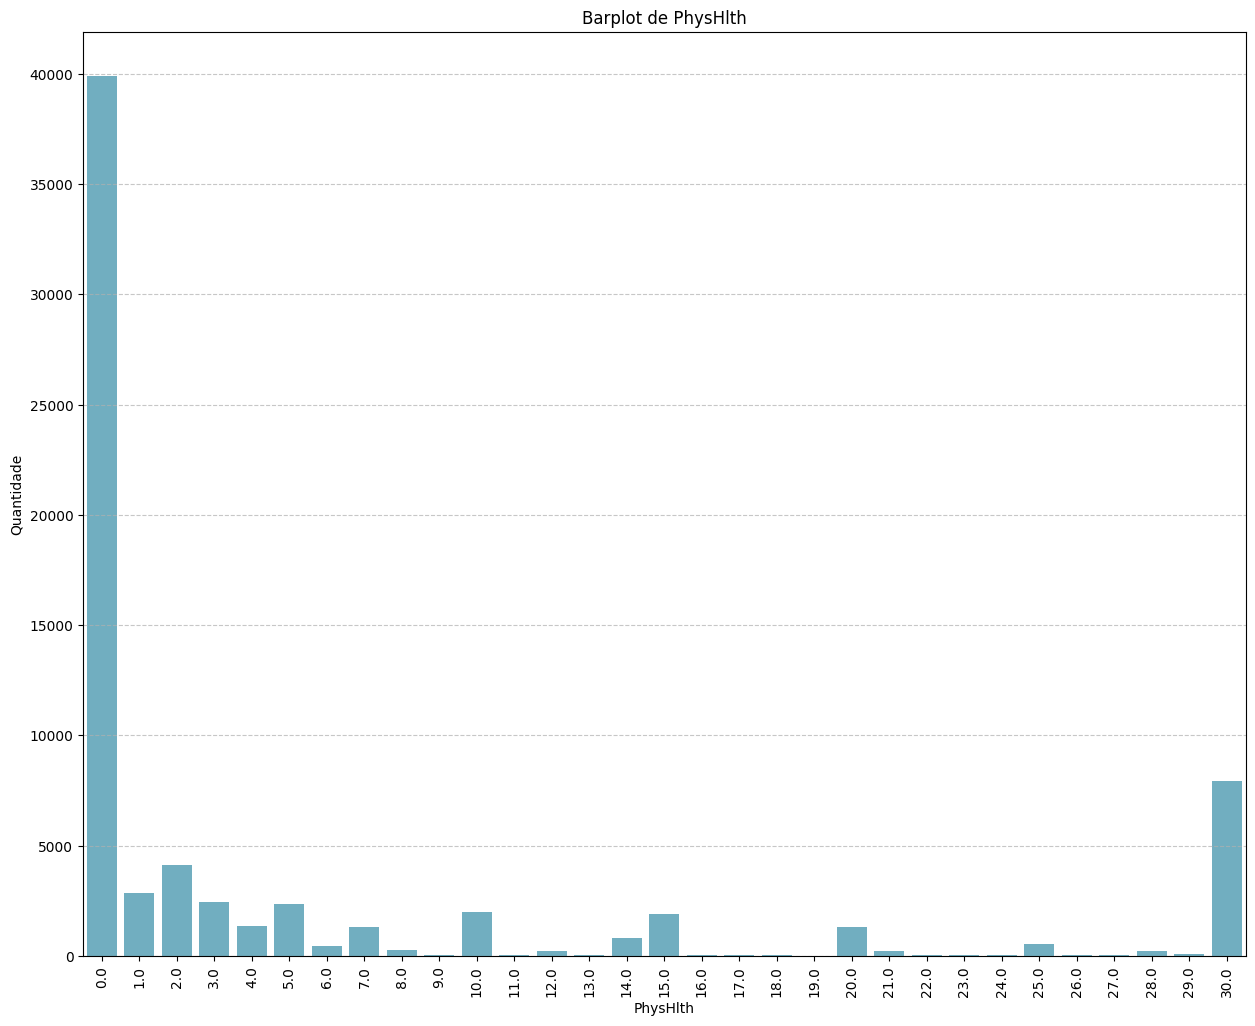

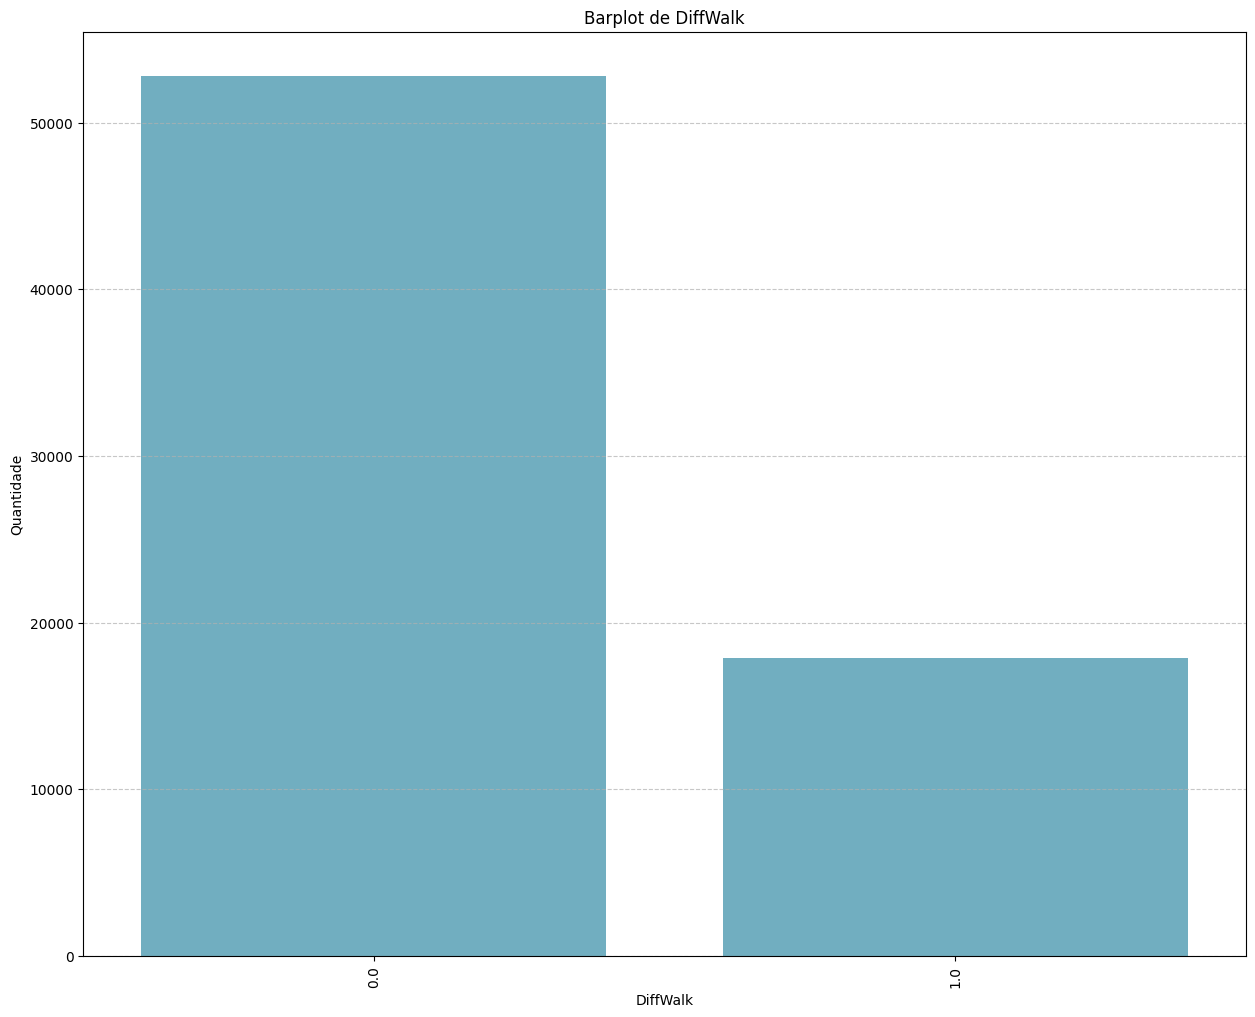

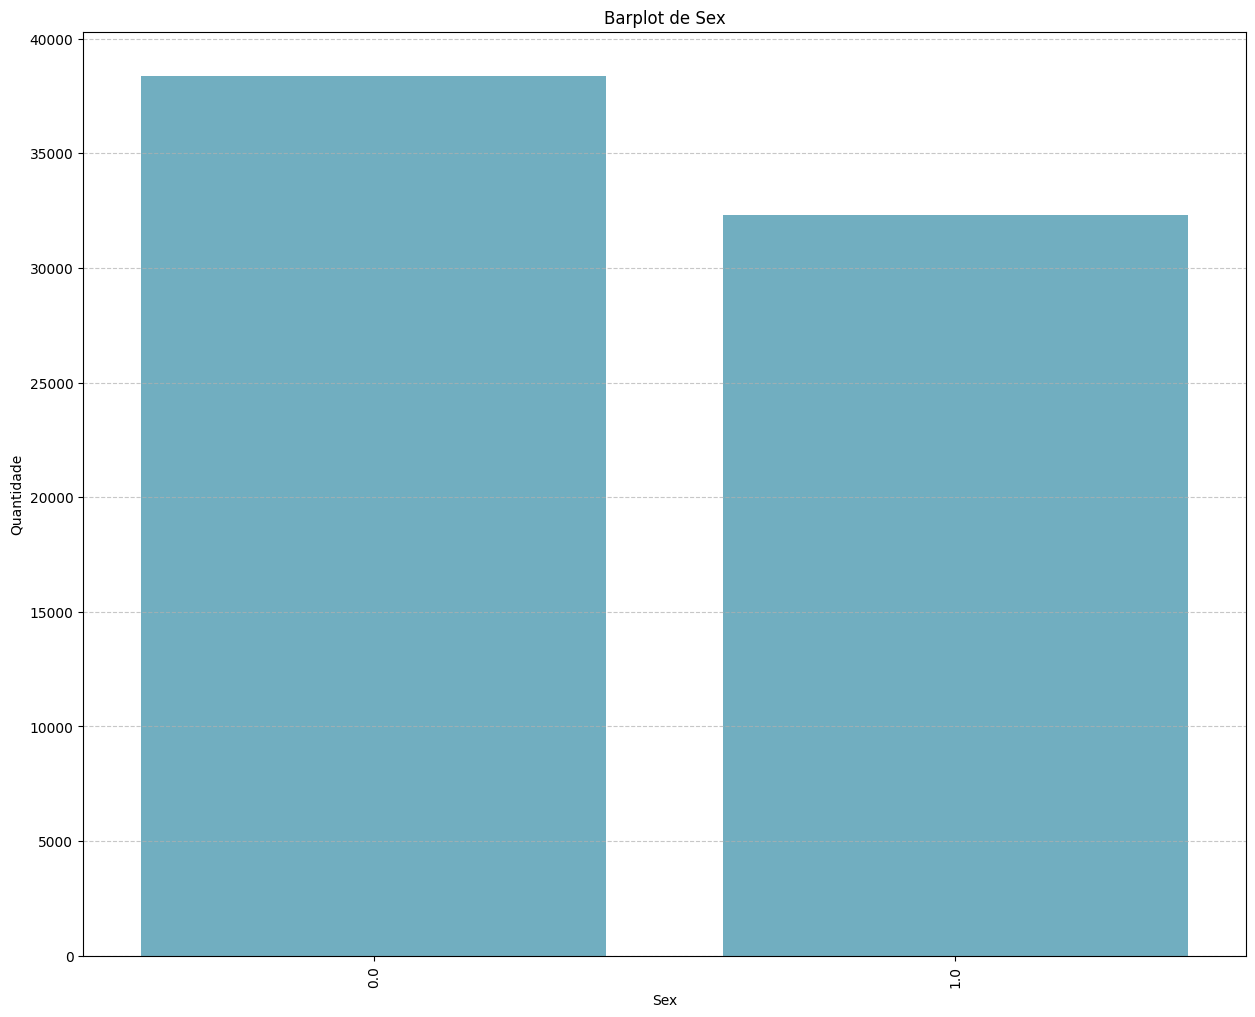

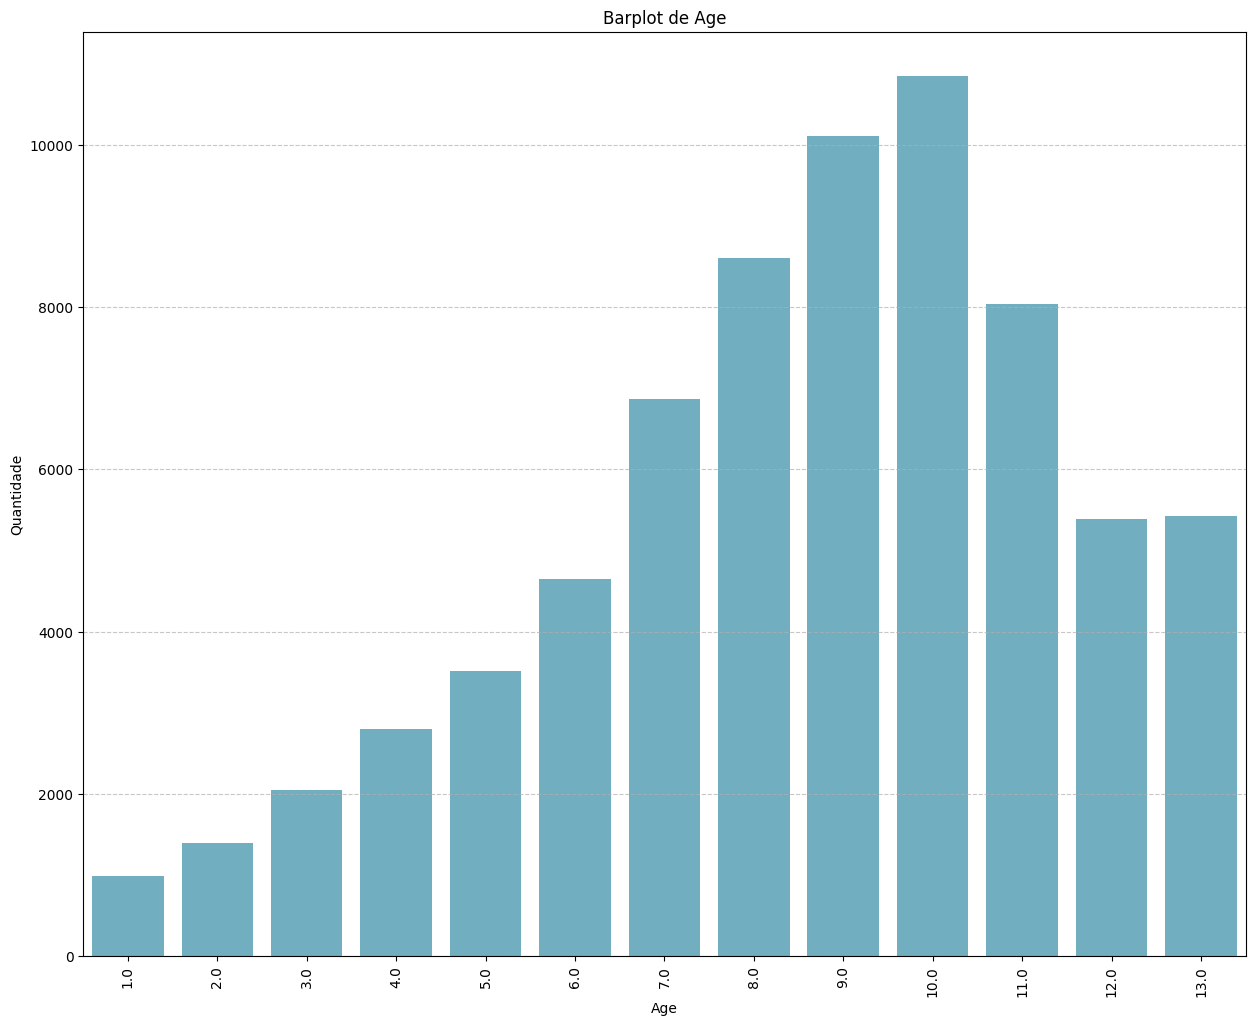

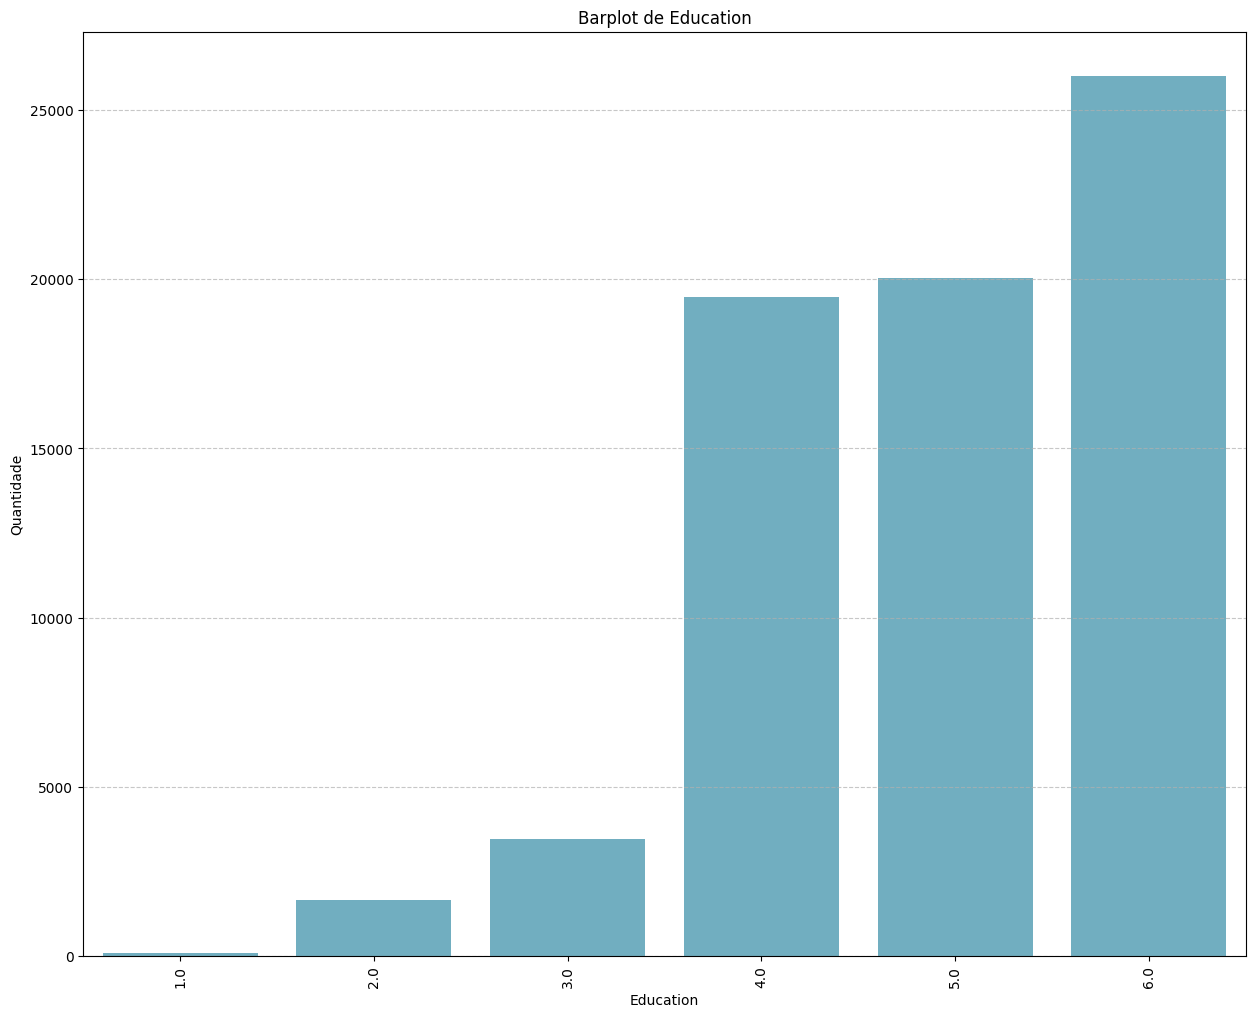

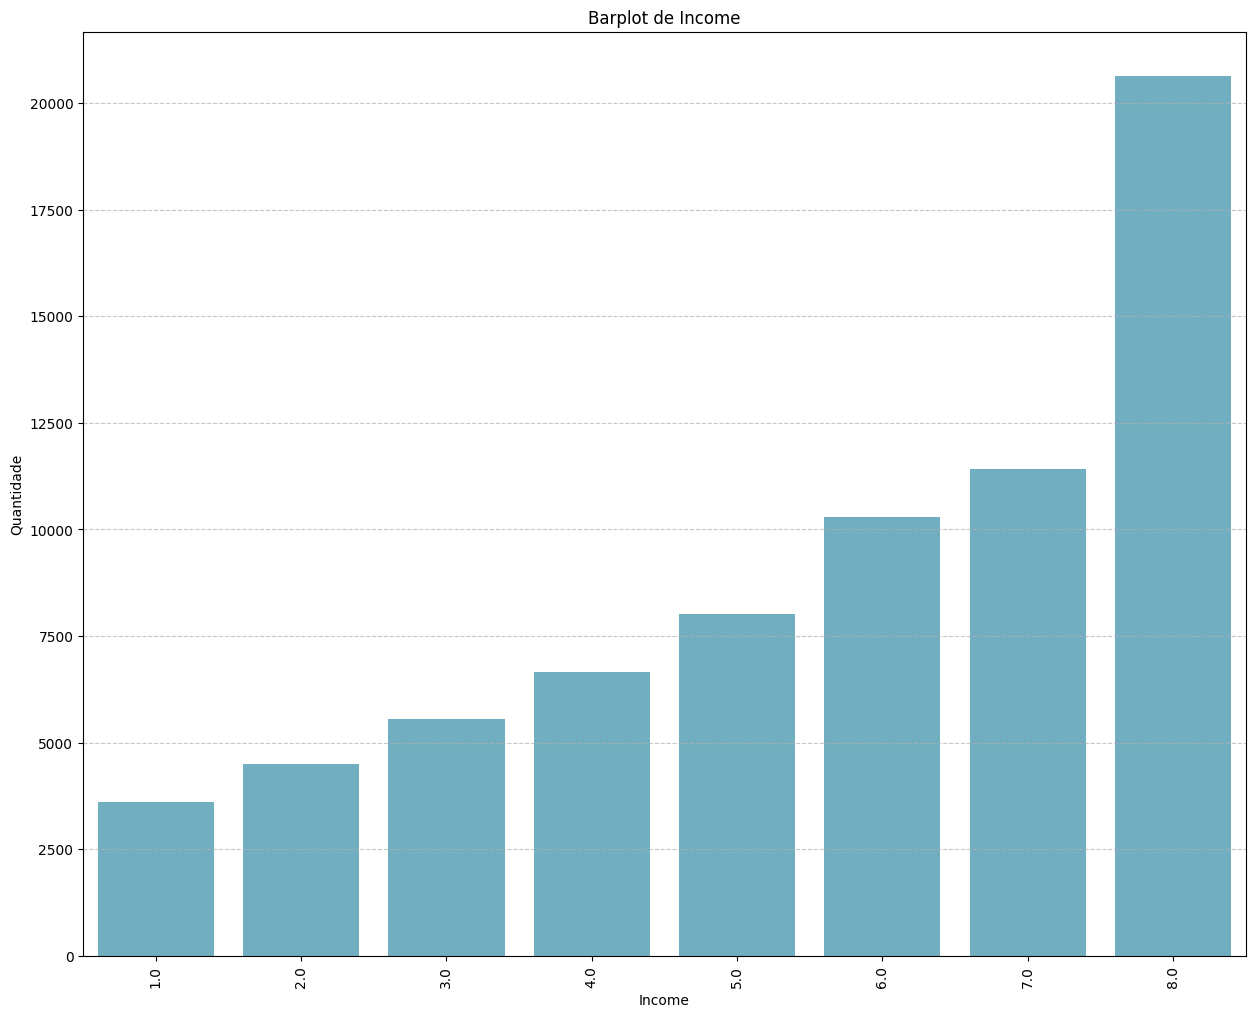

In [ ]:
for col in df.columns:
      plt.figure(figsize=(15, 12))
      sns.countplot(data=df, x=col, color='#64b5cd')
      plt.ylabel('Quantidade')
      plt.grid(axis='y', linestyle='--', alpha = 0.7)
      plt.xticks(rotation = 90)
      plt.title(f'Barplot de {col}')
      plt.show()

# 6. Insights

- O número de pessoas não diabéticas é o mesmo de diabéticas ou pré-diabéticas.
- Quanto maior o nível de renda (mais rico), maior é quantidade de pessoas no dataset com tal renda.
- As pessoas do nível 10 (entre 65 a 69 anos) são os de maior quantidade.
- O grupo etário menos frequente foi o de nível 1 (entre 18 a 24 anos).
- A maioria das pessoas é do sexo feminino.
- A maioria das pessoas não apresentam dificuldades ao andar ou subir escadas.
- A maioria das pessoas possui pressão alta.
- A maioria das pessoas possui colesterol alto.
- A maioria das pessoas verificou o colesterol.
- O maior IMC (BMI) foi o de 27.
- A maioria das pessoas não fuma.
- A maioria das pessoas não tiveram derrame.
- A maioria das pessoas não tem problemas cardíacos.
- A maioria das pessoas pratica exercícios físicos.
- A maioria das pessoas consome frutas e verduras.
- A maioria das pessoas não bebem.
- A maioria das pessoas tem algum plano de saúde.
- A maioria das pessoas não deixou de se consultar por conta do dinheiro.
- O maior nível de saúde em que as pessoas se avaliaram foi o de número 3, seguido do nível 2.
- Ter um dia em um mês com a saúde mental ruim foi bem comum.
- Ter um dia em um mês com a saúde física ruim foi bem comum.

## Pré-processamento de dados

- Normalização


In [3]:
df2 = df.loc[df['Diabetes_binary'] == 0].sample(n=5000, random_state=42)
df3 = df.loc[df['Diabetes_binary'] == 1].sample(n=5000, random_state=42)

df = pd.concat([df2, df3])
df = df.reset_index(drop=True)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,53.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,5.0
1,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,6.0,6.0
2,0.0,0.0,0.0,1.0,18.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0,7.0
3,0.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,1.0,0.0,1.0,12.0,4.0,6.0
4,0.0,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,8.0,6.0,7.0
9996,1.0,1.0,1.0,1.0,22.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,5.0,10.0,30.0,1.0,0.0,10.0,5.0,1.0
9997,1.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,5.0,6.0
9998,1.0,0.0,1.0,1.0,29.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,4.0,10.0,20.0,1.0,0.0,9.0,5.0,3.0


## Divisão do conjunto de dados

In [4]:
y = df['Diabetes_binary']
X = df.drop('Diabetes_binary', axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

- Escalonamento

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Treinamento e avaliação

Função genérica que faz o instanciamento e a validação cruzada para cada modelo, além de fazer o processo de tunelamento de hyperparâmetros e armazena os resultados das métricas de cada um em um vetor de resultados a ser retornado.

In [7]:
models = {}

models['SVM'] = {'Model': SVC(kernel='linear'),
                 'params': {'C': [0.1,1, 10, 100],
                            'gamma': [1,0.1,0.01,0.001]},
                 'best_params': dict()}

models['RandomForestClassifier'] = {'Model': RandomForestClassifier(),
                                    'params': {"n_estimators": [5,20,50,100],
                                               "min_samples_split": [2, 6, 10],
                                               "min_samples_leaf": [1, 3, 4]},
                                    'best_params': dict()}

models['KNN'] = {'Model': KNeighborsClassifier(metric='minkowski', p=2),
                 'params': {"n_neighbors": np.arange(2, 30, 1),
                            'weights': ['uniform','distance'],
                            'metric': ['minkowski','euclidean','manhattan']},
                 'best_params': dict()}

- Função de classificação que irá retornar o melhor modelo e seu score

In [40]:
def classification(model, params, X_train, y_train):

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rs = RandomizedSearchCV(model, params, n_iter = 10, scoring='f1', n_jobs=-1, cv=kf).fit(X_train, y_train)

    return rs.best_estimator_, rs.best_score_

- Função para pegar os resultados de treino avaliando vários modelos

In [41]:
def get_best_model(models, X_train, y_train):
    results = {}
    best_model = {'Name': str(), 'Model': None}
    best_score = 0.0

    for name, _ in models.items():
        model = models[name]['Model']
        model, score = classification(model, models[name]['params'], X_train, y_train)

        results['Model'].append(name)
        results['F1-score_train'].append(model.cv_results_["mean_train_f1"].mean())
        results['F1-score_test'].append(model.cv_results_["mean_test_f1"].mean())

        if score > best_score:
            best_score = score
            best_model['Name'] = name
            best_model['Model'] = model
        break

    return best_model, best_score, pd.DataFrame.from_dict(results, orient='index')

- Função de para avaliar o melhor modelo (com o conjunto de teste)

In [11]:
def get_test_scores(model, X_test, y_test):
    predictions = model['Model'].predict(X_test)

    results = {}
    results['Model'] = model['Name']
    results['F1-score'] = f1_score(y_test, predictions)

    return pd.DataFrame.from_dict(results, orient='index')

# Treinos

- Armazenamento dos resultados

In [30]:
train_results = {"Com_escalonamento" : {'Name':'', 'Model': None, 'F1-score': float()},
                    "Sem_escalonamento" : {'Name':'', 'Model': None, 'F1-score': float()}}

## Treino sem escalonamento

- Variáveis com o melhor modelo e seu score

In [ ]:
model1, score1, results1 = get_best_model(models, X_train, y_train)

- Resultados

In [ ]:
display(model1, score1)

{'Name': 'RandomForestClassifier',
 'Model': RandomForestClassifier(min_samples_leaf=4, min_samples_split=6, n_estimators=50)}

0.7538911488685393

## Treino com escalonamento

- Variáveis com o melhor modelo e seu score

In [ ]:
rs2 = get_best_model(models, custom_scorer, X_train_scaled, y_train)

- Resultados

In [ ]:
display(model2, score2)

{'Name': 'RandomForestClassifier',
 'Model': RandomForestClassifier(min_samples_leaf=3, min_samples_split=10,
                        n_estimators=50)}

0.7536015290239815

- Armazenamento dos resultados de treino

In [ ]:
train_results['Sem_escalonamento']['Name'] = model1['Name']
train_results['Sem_escalonamento']['Model'] = model1['Model']
train_results['Sem_escalonamento']['F1-score'] = score1
train_results['Com_escalonamento']['Name'] = model2['Name']
train_results['Com_escalonamento']['Model'] = model2['Model']
train_results['Com_escalonamento']['F1-score'] = score2

# Testes

- Armazenamento dos resultados

In [ ]:
test_results = {"Com_escalonamento" : {'Name':'', 'F1-score': float()},
                    "Sem_escalonamento" : {'Name':'', 'F1-score': float()}}

## Teste sem escalonamento

- Resultados

In [ ]:
semEsc = get_test_scores(model1, X_test, y_test)

## Teste com escalonamento

- Resultados

In [ ]:
comEsc = get_test_scores(model2, X_test_scaled, y_test)

- Armazenamento dos resultados de teste

In [ ]:
test_results['Sem_escalonamento']['Name'] = semEsc[0]['Model']
test_results['Sem_escalonamento']['F1-score'] = semEsc[0]['F1-score']
test_results['Com_escalonamento']['Name'] = comEsc[0]['Model']
test_results['Com_escalonamento']['F1-score'] = comEsc[0]['F1-score']

# Resultados finais

## Treino

- Tabela

In [ ]:
train_results_df = pd.DataFrame(train_results)
train_results_df

,Com_escalonamento,Sem_escalonamento
Name,RandomForestClassifier,RandomForestClassifier
Model,"RandomForestClassifier(min_samples_leaf=3, min...","RandomForestClassifier(min_samples_leaf=4, min..."
F1-score,0.753602,0.753891


- Gráfico

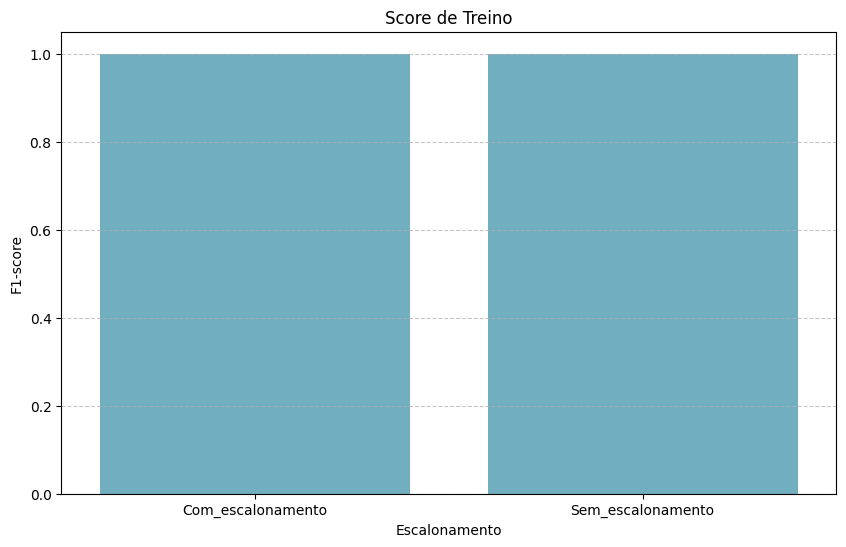

In [ ]:
train_df = train_results_df.transpose()
train_df.pop('Model')
train_df = train_df.transpose()
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x=train_df.columns, color='#64b5cd')
plt.ylabel('F1-score')
plt.xlabel('Escalonamento')
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.title(f'Score de Treino')
plt.show()

## Teste

- Tabela

In [ ]:
test_results_df = pd.DataFrame(test_results)
test_results_df

,Com_escalonamento,Sem_escalonamento
Name,RandomForestClassifier,RandomForestClassifier
F1-score,0.766825,0.761407


- Gráfico

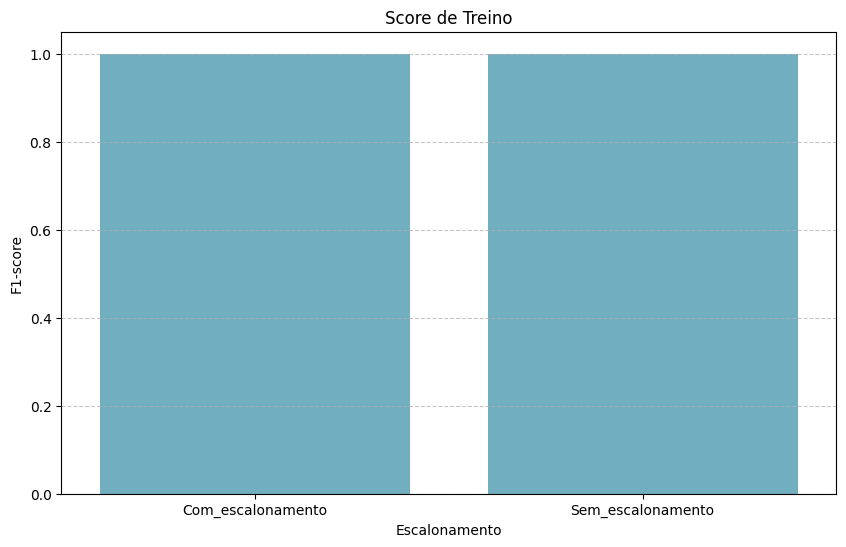

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=test_results_df, x=test_results_df.columns, color='#64b5cd')
plt.ylabel('F1-score')
plt.xlabel('Escalonamento')
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.title(f'Score de Treino')
plt.show()

De modo geral, o melhor modelo escolhido foi o RandomForestClassifier.

Quando analisamos o treino com e sem escalonamento, o melhor score obtido foi o sem escalonamento, de pouca diferença. Mas quando analisamos o teste, o melhor valor obtido foi o com escalonamento, apesar de seu score um pouco baixo nos dados de treino em comparação ao sem escalonamento.